In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
from glob import glob

sns.set(context='talk', style='white')

study_dir = '/Users/catcamacho/Library/CloudStorage/Box-Box/CRAB/CRAB_lab/studies/crab-seal_hbcdmovies_pilot_2025'
data_dir = os.path.join(study_dir, 'DATA','V1_motion_processed')
figs_dir = './figs'
subinfo = pd.read_csv(os.path.join(study_dir,'DATA','redcap_exports','ChildMovieStudy-Basics_DATA_2025-06-23_0804.csv'),index_col=0)
clipinfo = pd.read_csv(os.path.join(study_dir, 'measures','clips','clipinfo.csv'), index_col=0)

subs = sorted(os.listdir(data_dir))
subinfo.index = subinfo.index.astype(str)
print('Sample size analyzed so far: {0}'.format(len(subs)))

Sample size analyzed so far: 32


## Motion plots
Notes
* meanFD = average FD across the movie
* pcCens9 = pecent censored if the FD threshold is 0.9mm FD
* pcCens2 = pecent censored if the FD threshold is 0.2mm FD
* each dot is color coded by participant ID (some colors are very similar though)

In [4]:
data = pd.DataFrame()
i=0
for sub in subs:
    subdata = pd.read_csv(os.path.join(data_dir, sub, '{0}_motion_summary.csv'.format(sub)), index_col=0)
    for movie in subdata.index:
        data.loc[i, 'sub'] = sub
        try:
            data.loc[i, 'age'] = subinfo.loc[sub, 'child_age']
            data.loc[i, 'sex'] = subinfo.loc[sub, 'c_gender']
        except:
            pass
        data.loc[i, 'movie'] = movie
        data.loc[i, 'human'] = clipinfo.loc[movie,'humans']
        data.loc[i, 'speaking'] = clipinfo.loc[movie,'speaking']
        data.loc[i, 'contained'] = clipinfo.loc[movie,'contained']
        data.loc[i, 'meanFD'] = subdata.loc[movie, 'meanFD']
        data.loc[i, 'pcCens9'] = subdata.loc[movie, 'pcent_volscens_0.9']
        data.loc[i, 'pcCens2'] = subdata.loc[movie, 'pcent_volscens_0.2']
        data.loc[i, 'interest'] = subdata.loc[movie, 'interest']
        data.loc[i, 'pos_aff'] = subdata.loc[movie, 'pos_aff']
        data.loc[i, 'neg_aff'] = subdata.loc[movie, 'neg_aff']
        data.loc[i, 'aff_intensity'] = subdata.loc[movie, 'aff_intensity']
        i=i+1

data = data.sort_values('movie')
#data.describe()

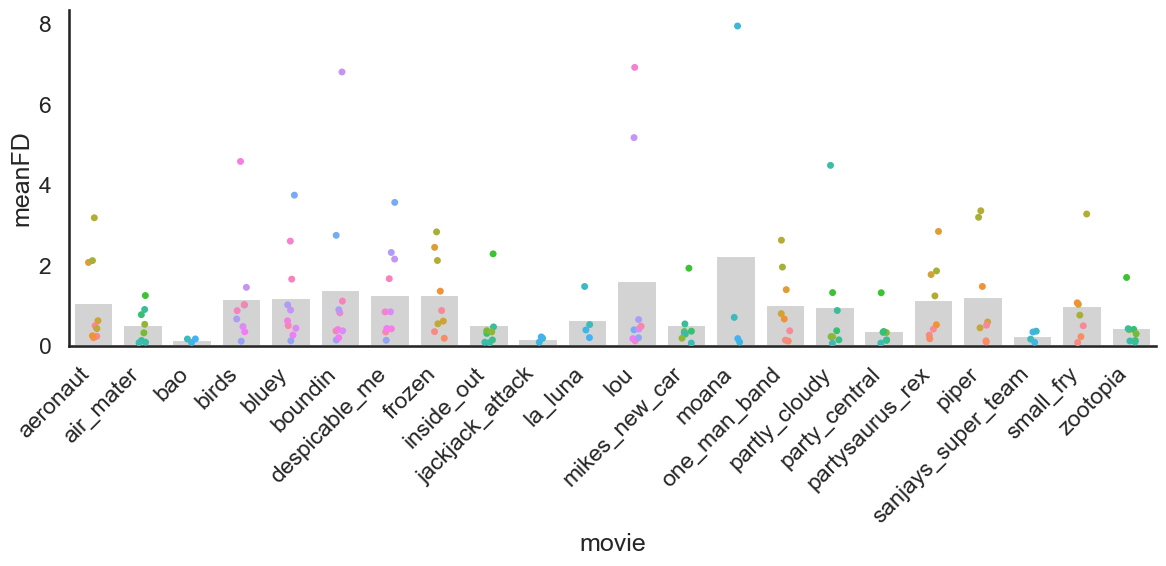

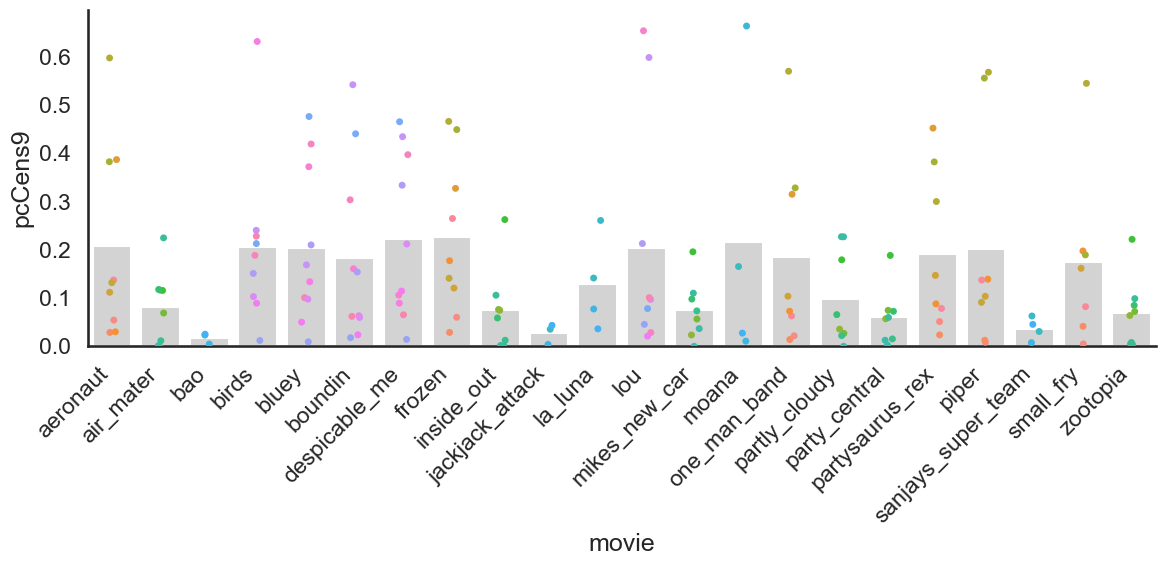

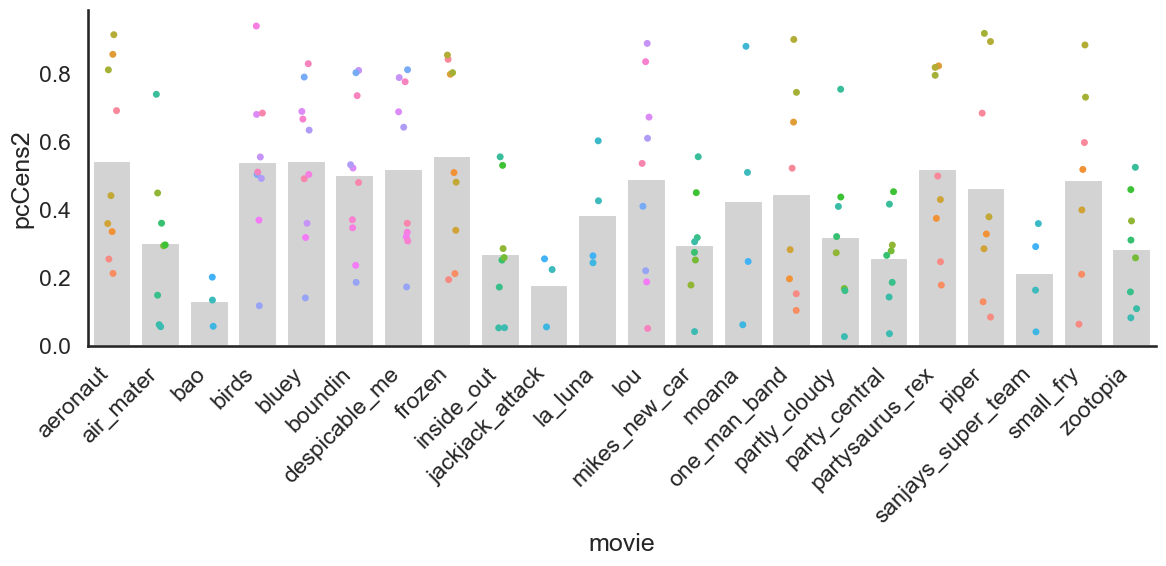

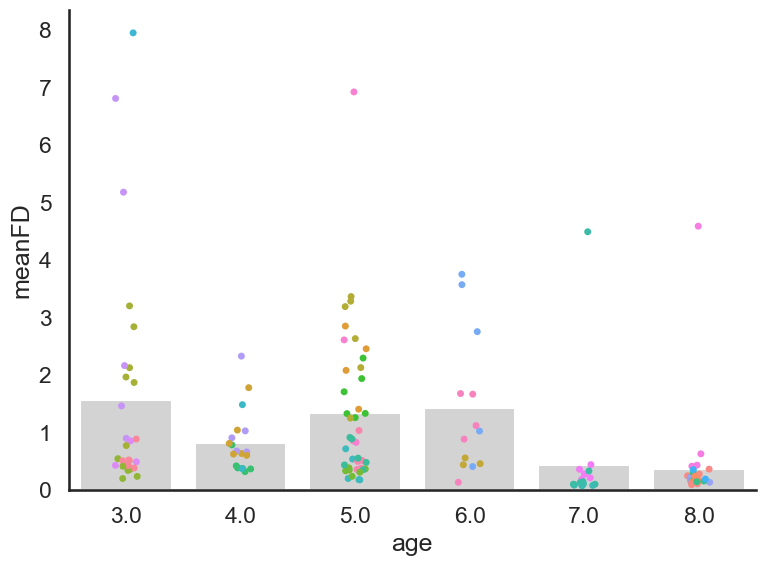

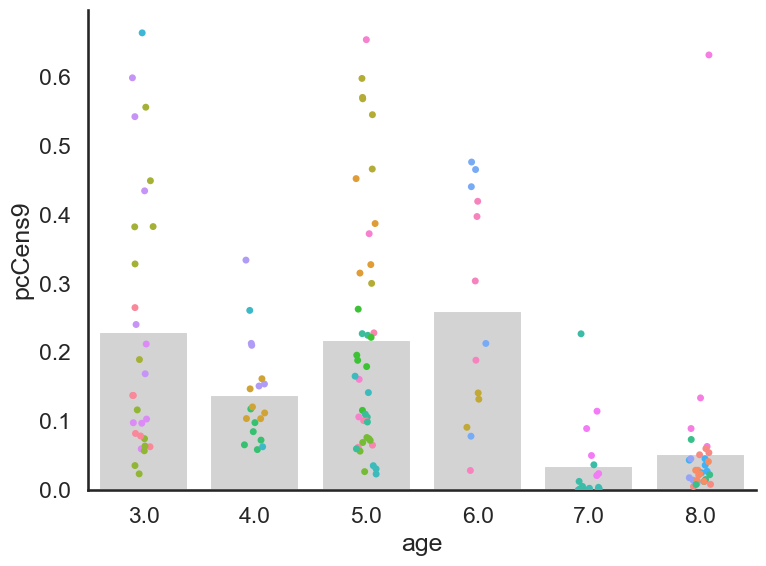

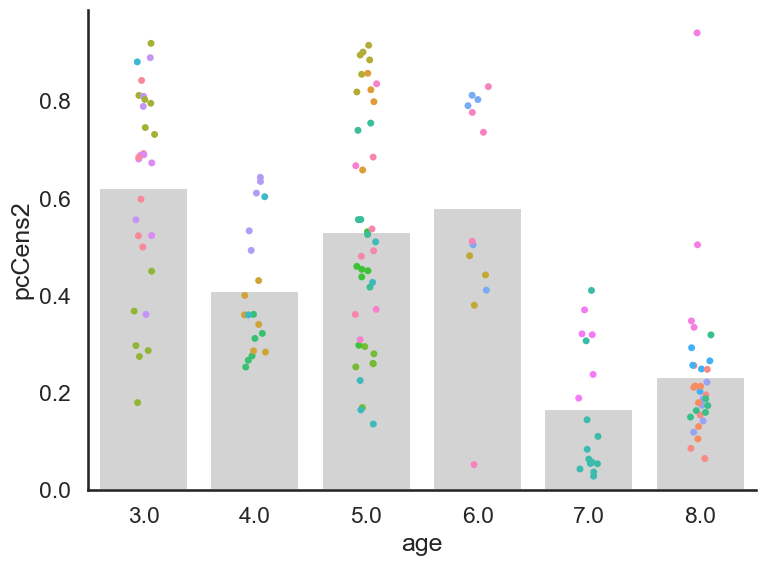

In [5]:
# plot mean FD

for v in ['meanFD','pcCens9','pcCens2']:

    plt.figure(figsize=(12,6))
    sns.barplot(y=v,x='movie', data=data, color='lightgray',errwidth=0)
    sns.stripplot(y=v,x='movie', data=data, hue='sub')
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.legend().remove()
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'fullsample_clip_motion_{0}_plot.png'.format(v)), dpi=200)
    plt.show()
    plt.close()

for v in ['meanFD','pcCens9','pcCens2']:

    plt.figure(figsize=(8,6))
    sns.barplot(y=v, x='age', data=data, color='lightgray',errwidth=0)
    sns.stripplot(y=v, x='age', data=data, hue='sub')
    plt.legend().remove()
    sns.despine()
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'fullsample_age_motion_{0}_plot.png'.format(v)), dpi=200)
    plt.show()
    plt.close()

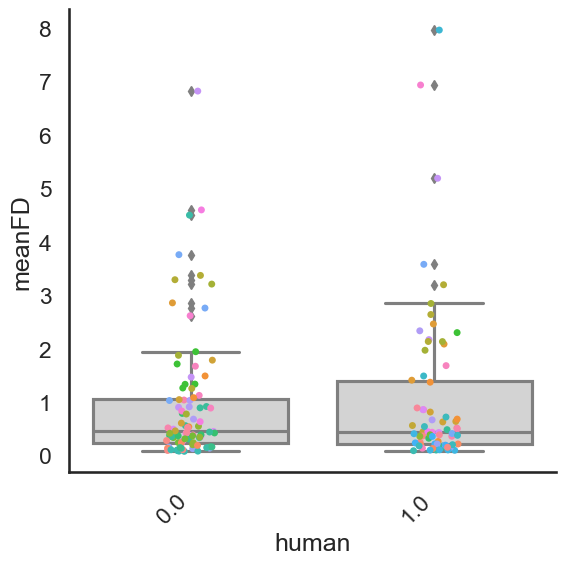

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: meanFD   
No. Observations: 143     Method:             REML     
No. Groups:       29      Scale:              0.4756   
Min. group size:  1       Log-Likelihood:     -192.9611
Max. group size:  6       Converged:          Yes      
Mean group size:  4.9                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept  1.032     0.266  3.881  0.000   0.511   1.553
human      0.050     0.132  0.379  0.705  -0.209   0.308
sub Var    1.834     0.965                              



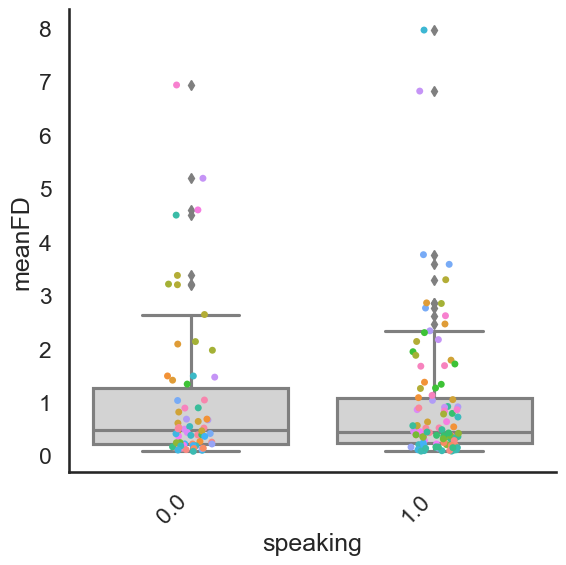

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: meanFD   
No. Observations: 143     Method:             REML     
No. Groups:       29      Scale:              0.4689   
Min. group size:  1       Log-Likelihood:     -192.1668
Max. group size:  6       Converged:          Yes      
Mean group size:  4.9                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept  0.944     0.273  3.464  0.001   0.410   1.478
speaking   0.173     0.131  1.317  0.188  -0.084   0.430
sub Var    1.837     0.968                              



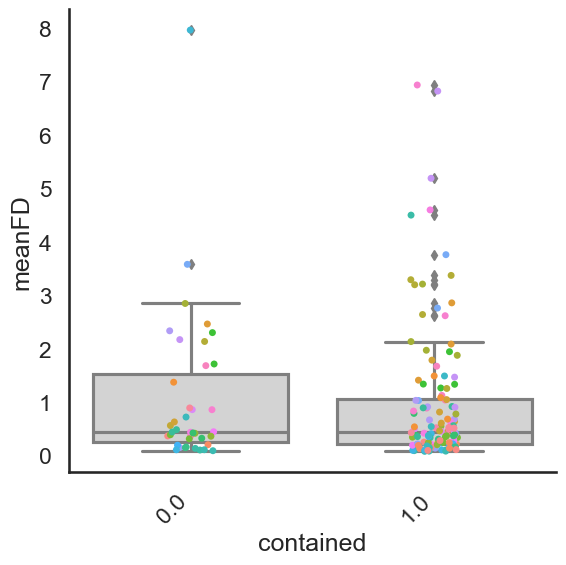

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: meanFD   
No. Observations: 143     Method:             REML     
No. Groups:       29      Scale:              0.4733   
Min. group size:  1       Log-Likelihood:     -192.4407
Max. group size:  6       Converged:          Yes      
Mean group size:  4.9                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     1.161    0.277  4.188 0.000  0.617  1.704
contained    -0.144    0.138 -1.042 0.297 -0.415  0.127
sub Var       1.808    0.954                           



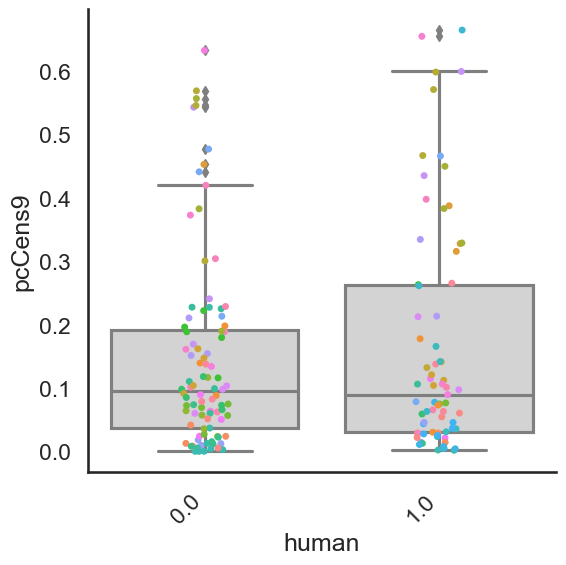

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pcCens9 
No. Observations: 143     Method:             REML    
No. Groups:       29      Scale:              0.0065  
Min. group size:  1       Log-Likelihood:     111.2524
Max. group size:  6       Converged:          Yes     
Mean group size:  4.9                                 
------------------------------------------------------
              Coef. Std.Err.   z   P>|z| [0.025 0.975]
------------------------------------------------------
Intercept     0.150    0.029 5.183 0.000  0.094  0.207
human         0.015    0.015 0.978 0.328 -0.015  0.045
sub Var       0.022    0.090                          



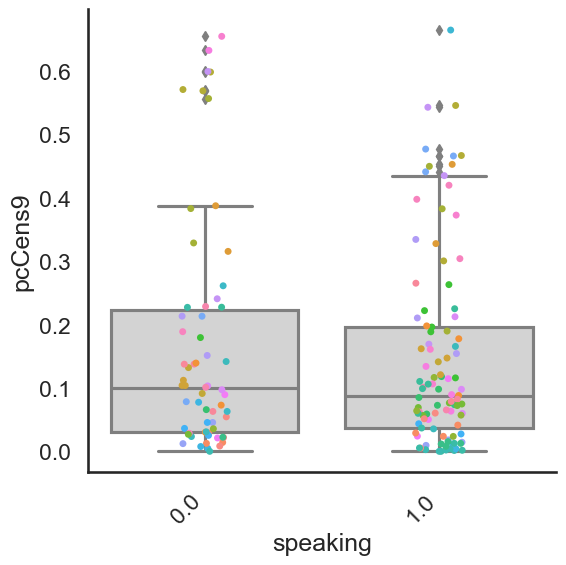

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pcCens9 
No. Observations: 143     Method:             REML    
No. Groups:       29      Scale:              0.0065  
Min. group size:  1       Log-Likelihood:     111.3946
Max. group size:  6       Converged:          Yes     
Mean group size:  4.9                                 
------------------------------------------------------
              Coef. Std.Err.   z   P>|z| [0.025 0.975]
------------------------------------------------------
Intercept     0.146    0.030 4.859 0.000  0.087  0.205
speaking      0.017    0.015 1.113 0.266 -0.013  0.047
sub Var       0.022    0.091                          



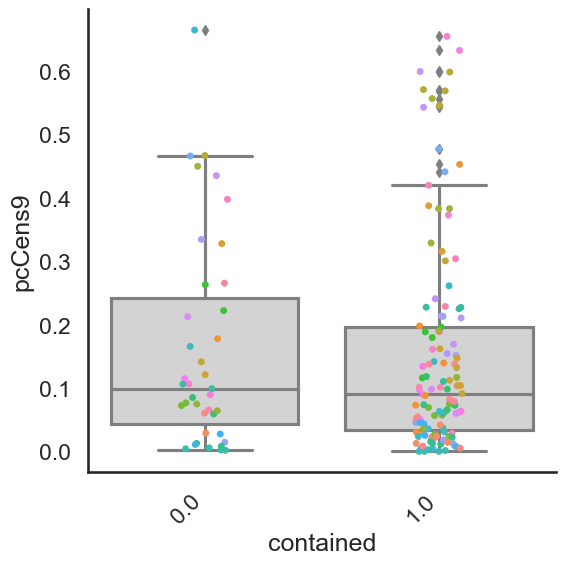

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pcCens9 
No. Observations: 143     Method:             REML    
No. Groups:       29      Scale:              0.0064  
Min. group size:  1       Log-Likelihood:     112.6052
Max. group size:  6       Converged:          Yes     
Mean group size:  4.9                                 
------------------------------------------------------
            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept    0.180    0.031  5.868 0.000  0.120  0.240
contained   -0.030    0.016 -1.899 0.058 -0.062  0.001
sub Var      0.022    0.090                           



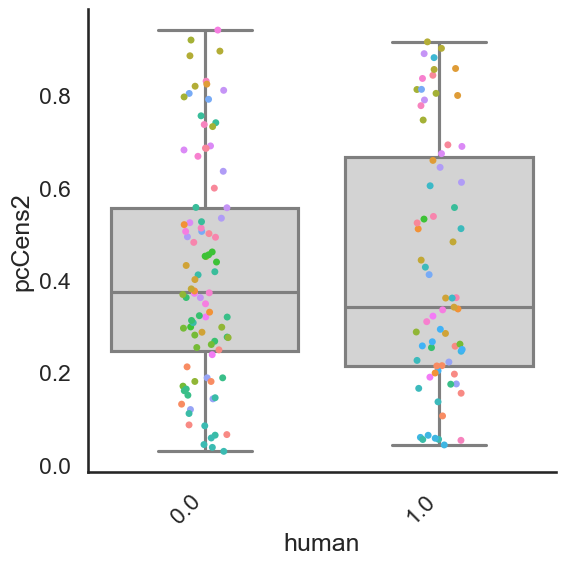

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pcCens2
No. Observations: 143     Method:             REML   
No. Groups:       29      Scale:              0.0132 
Min. group size:  1       Log-Likelihood:     60.0705
Max. group size:  6       Converged:          Yes    
Mean group size:  4.9                                
-----------------------------------------------------
           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------
Intercept   0.432    0.043  9.932 0.000  0.347  0.517
human      -0.003    0.022 -0.136 0.892 -0.046  0.040
sub Var     0.049    0.136                           



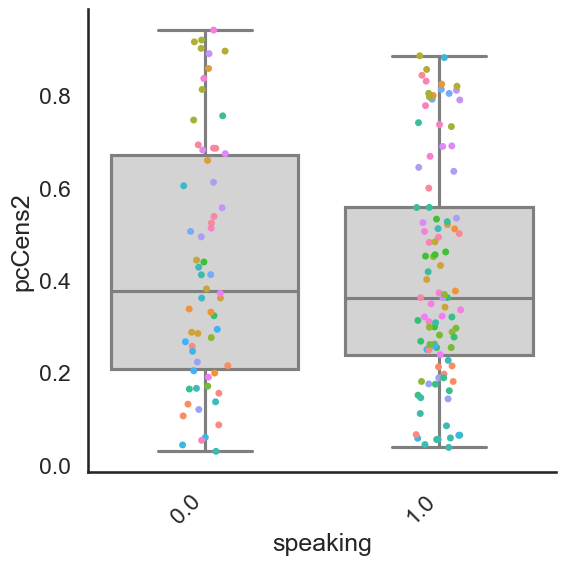

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pcCens2
No. Observations: 143     Method:             REML   
No. Groups:       29      Scale:              0.0130 
Min. group size:  1       Log-Likelihood:     61.1801
Max. group size:  6       Converged:          Yes    
Mean group size:  4.9                                
-----------------------------------------------------
             Coef. Std.Err.   z   P>|z| [0.025 0.975]
-----------------------------------------------------
Intercept    0.410    0.045 9.150 0.000  0.322  0.497
speaking     0.033    0.022 1.502 0.133 -0.010  0.076
sub Var      0.050    0.138                          



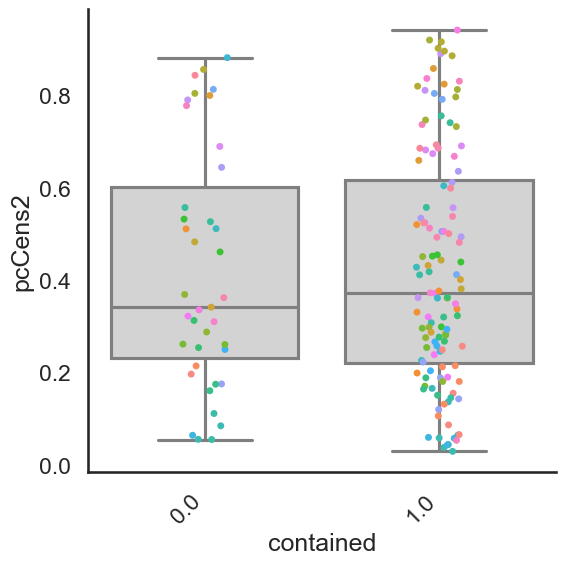

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pcCens2
No. Observations: 143     Method:             REML   
No. Groups:       29      Scale:              0.0131 
Min. group size:  1       Log-Likelihood:     60.7907
Max. group size:  6       Converged:          Yes    
Mean group size:  4.9                                
-----------------------------------------------------
           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------
Intercept   0.450    0.046  9.865 0.000  0.361  0.540
contained  -0.027    0.023 -1.170 0.242 -0.072  0.018
sub Var     0.049    0.136                           



In [6]:
for v in ['meanFD','pcCens9','pcCens2']:
    for f in ['human','speaking','contained']:

        plt.figure(figsize=(6,6))
        sns.boxplot(y=v,x=f, data=data, color='lightgray')
        sns.stripplot(y=v,x=f, data=data, hue='sub')
        plt.xticks(rotation=45, ha='right')
        sns.despine()
        plt.legend().remove()
        plt.tight_layout()
        plt.savefig(os.path.join(figs_dir, 'fullsample_feature_{0}_motion_{1}_plot.png'.format(f,v)), dpi=200)
        plt.show()
        plt.close()
        
        temp = data.dropna().copy()
        res = smf.mixedlm('{0} ~ {1}'.format(v,f), groups='sub', data=temp).fit()
        print(res.summary())

# Plots by age group

## 3-4 year olds (only 1 without sound so far)

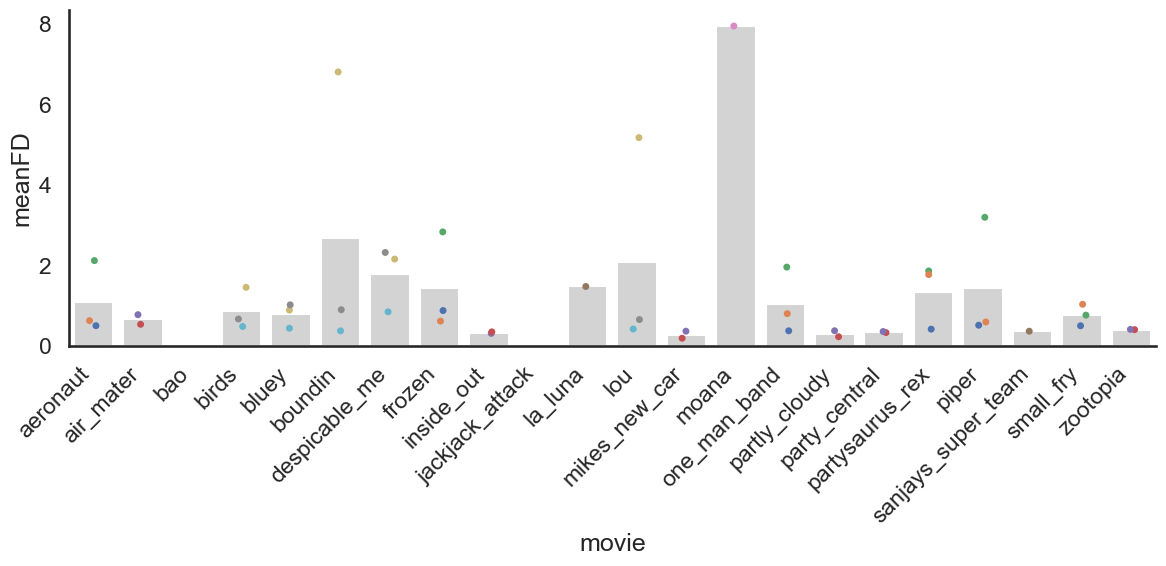

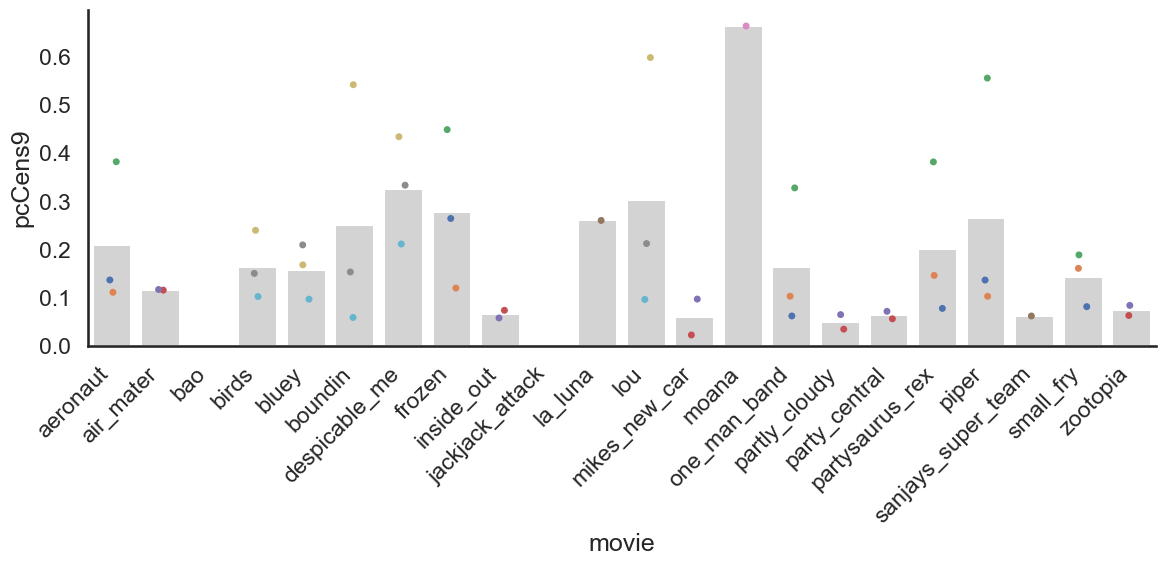

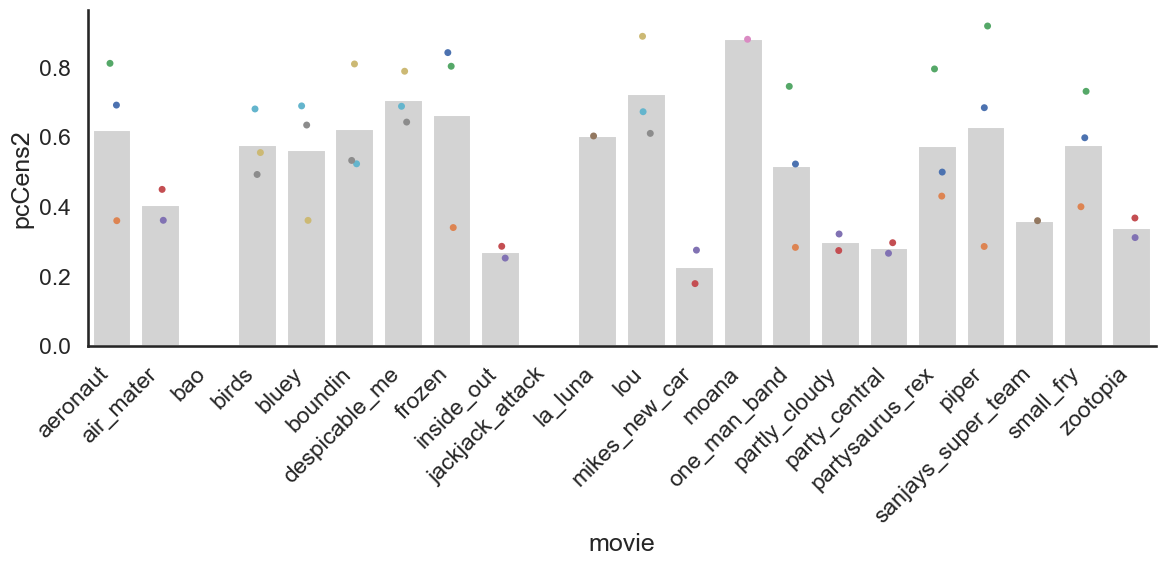

In [7]:
tempdata = data.loc[data['age']<5,:].copy()

# plot mean FD

for v in ['meanFD','pcCens9','pcCens2']:

    plt.figure(figsize=(12,6))
    sns.barplot(y=v,x='movie', data=tempdata, color='lightgray',errwidth=0)
    sns.stripplot(y=v,x='movie', data=tempdata, hue='sub')
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.legend().remove()
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'ages34_clip_motion_{0}_plot.png'.format(v)), dpi=200)
    plt.show()
    plt.close()

## 5-6 year olds

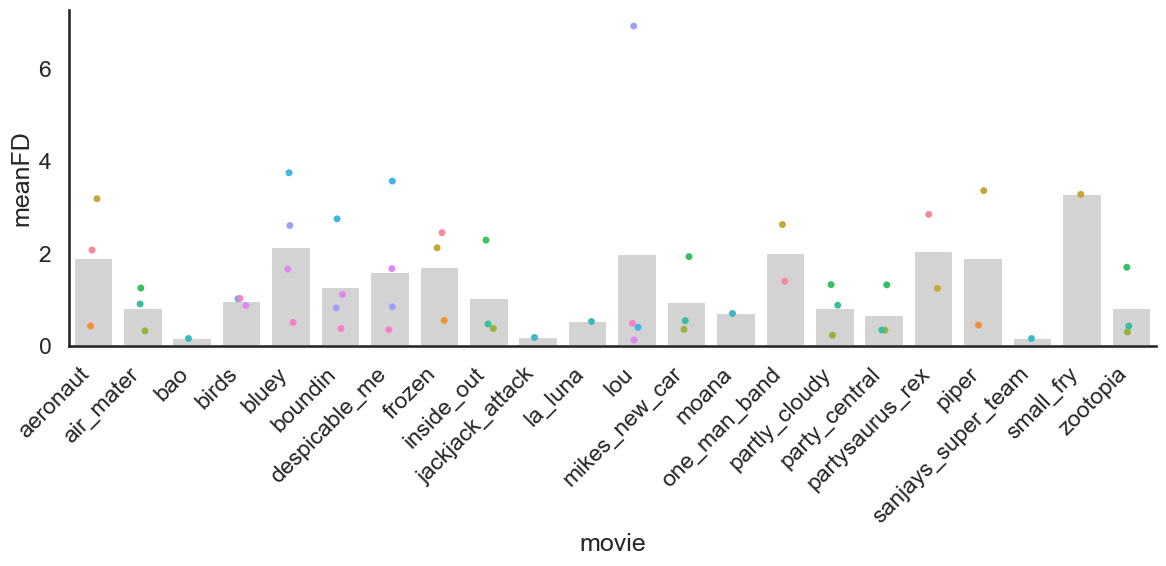

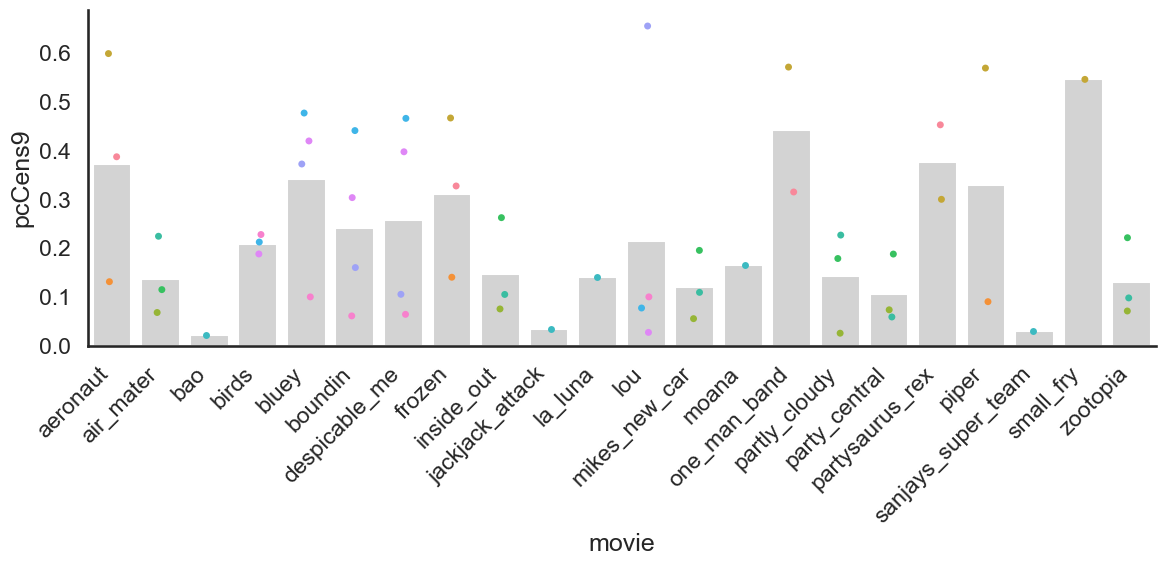

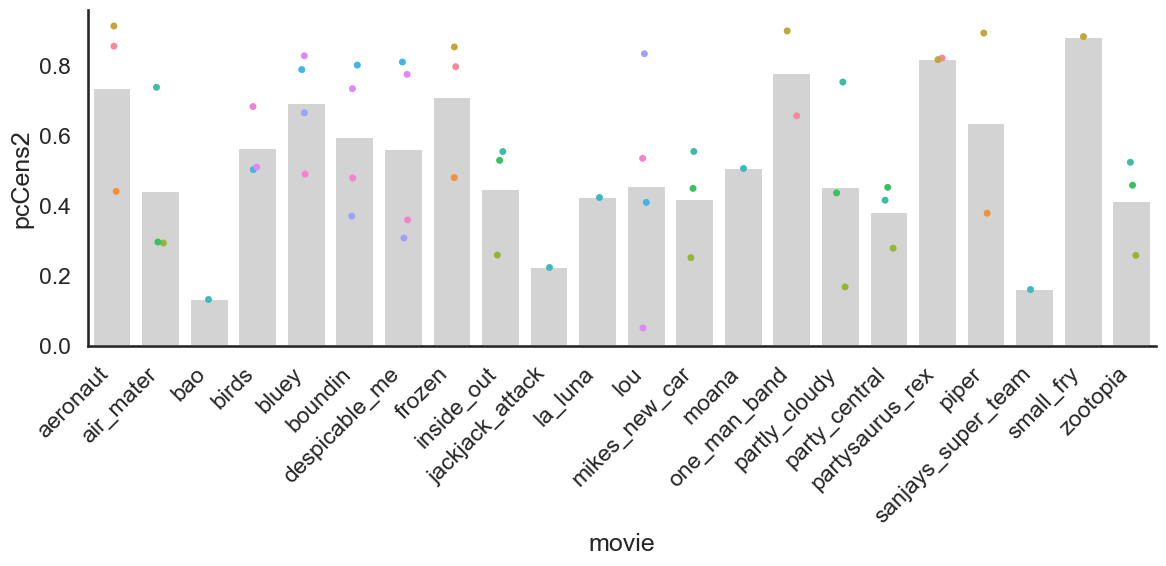

In [8]:
tempdata = data.loc[(data['age']==5) | (data['age']==6),:].copy()

# plot mean FD

for v in ['meanFD','pcCens9','pcCens2']:

    plt.figure(figsize=(12,6))
    sns.barplot(y=v,x='movie', data=tempdata, color='lightgray',errwidth=0)
    sns.stripplot(y=v,x='movie', data=tempdata, hue='sub')
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.legend().remove()
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'ages56_clip_motion_{0}_plot.png'.format(v)), dpi=200)
    plt.show()
    plt.close()

## 7-8 year olds

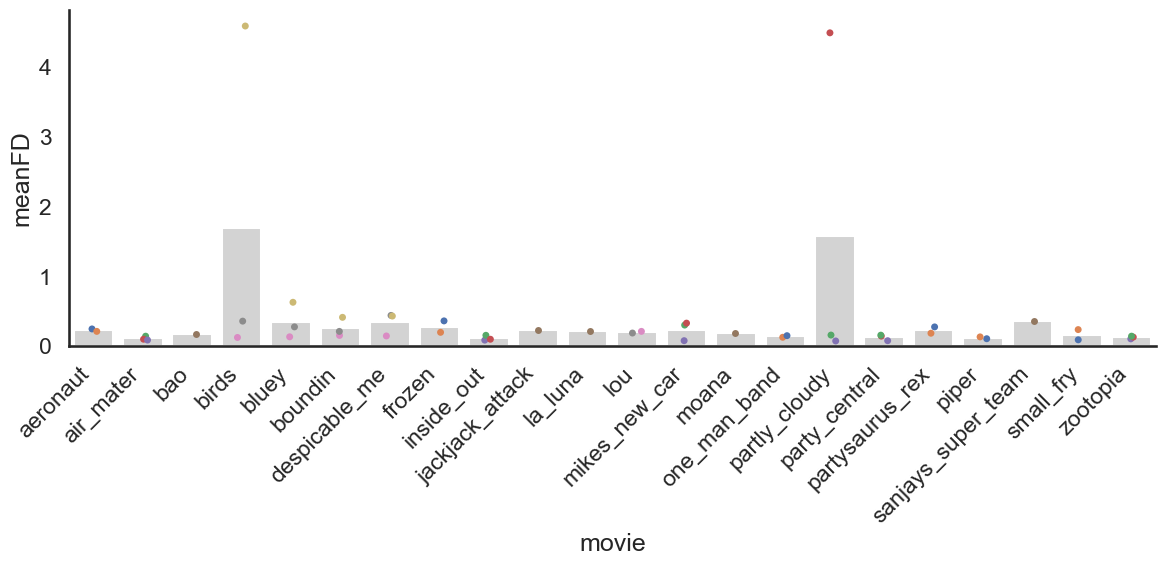

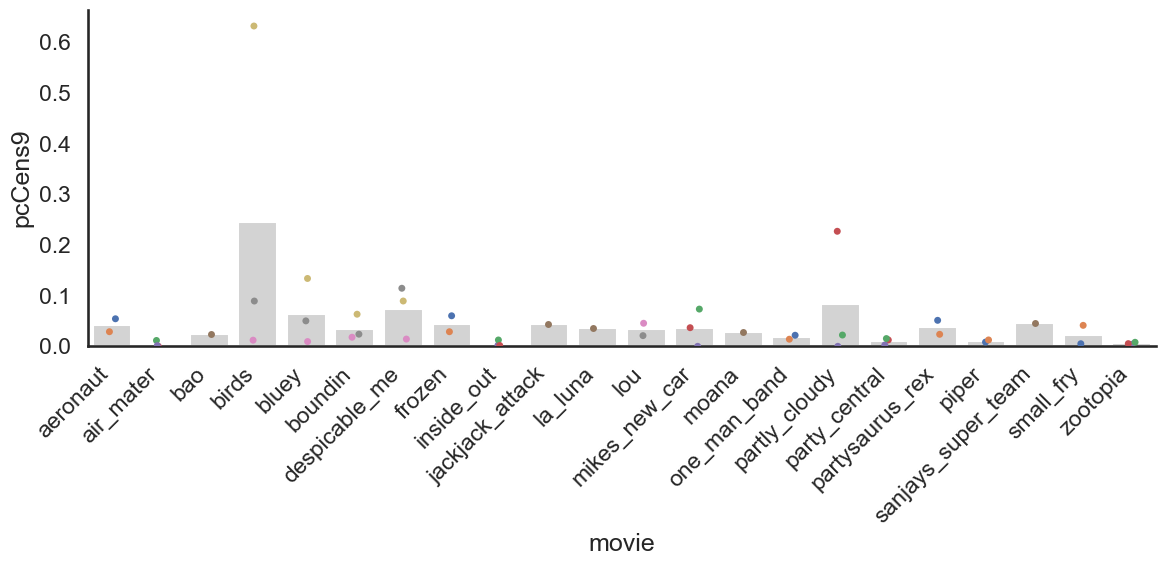

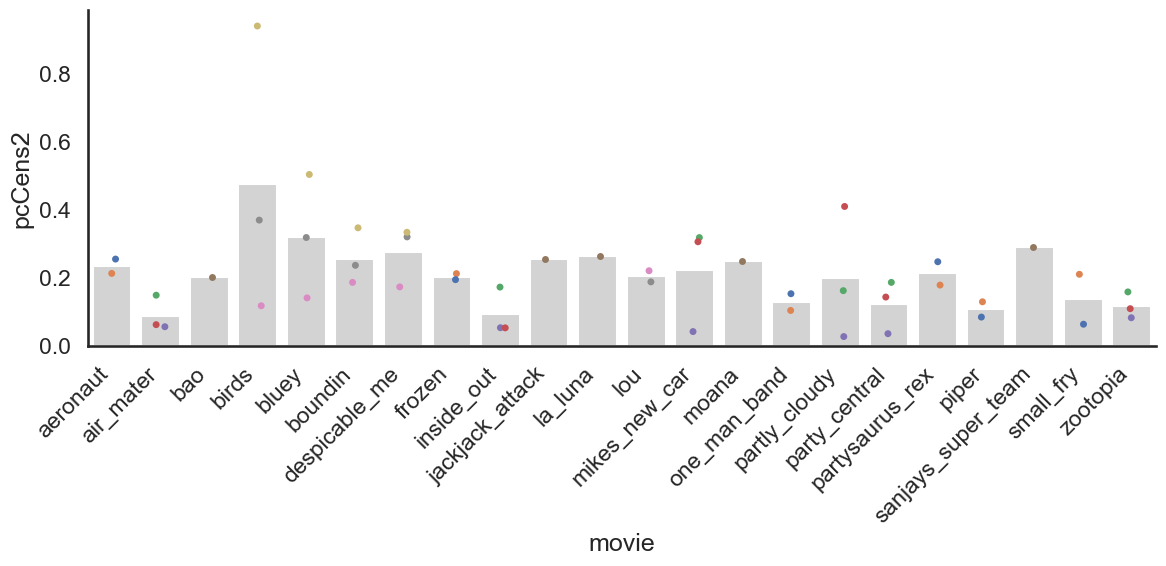

In [9]:
tempdata = data.loc[(data['age']==7) | (data['age']==8),:].copy()

# plot mean FD

for v in ['meanFD','pcCens9','pcCens2']:

    plt.figure(figsize=(12,6))
    sns.barplot(y=v,x='movie', data=tempdata, color='lightgray',errwidth=0)
    sns.stripplot(y=v,x='movie', data=tempdata, hue='sub')
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.legend().remove()
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'ages78_clip_motion_{0}_plot.png'.format(v)), dpi=200)
    plt.show()
    plt.close()

# get timeseries of motion across clips

In [10]:
clipmotion = {}
for mov in clipinfo.index:
    clipmotion[mov] = pd.DataFrame(index=range(0,3001))

In [11]:
for sub in subs:
    subdata = pd.read_csv(os.path.join(data_dir, sub, '{0}_motion_data_processed.csv'.format(sub)), index_col=0)
    clips = np.unique(subdata['title'].dropna())
    for clip in clips:
        temp = subdata.loc[subdata['title']==clip,'FD50'].to_numpy()
        clipmotion[clip].loc[:temp.shape[0]-1,sub] = temp
        

In [12]:
for mov in clipinfo.index:
    clipmotion[mov] = clipmotion[mov].dropna(axis=0,how='all')

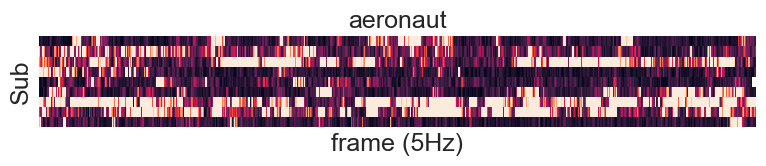

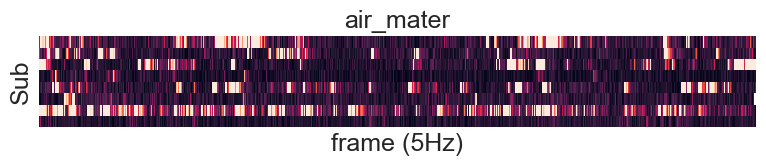

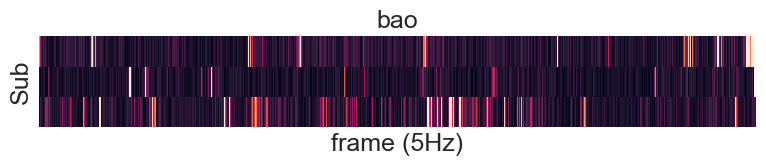

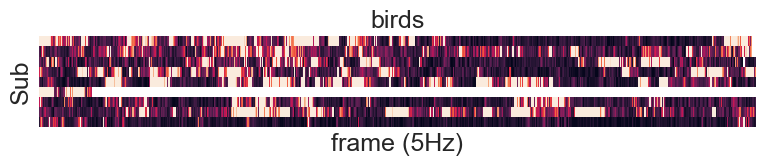

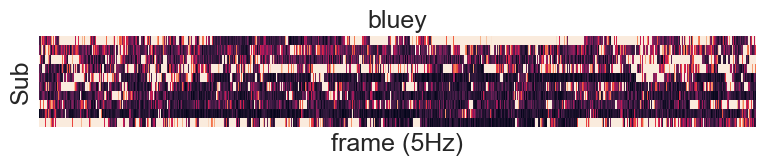

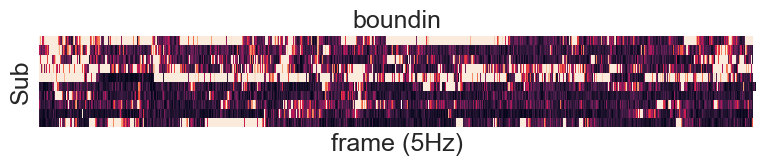

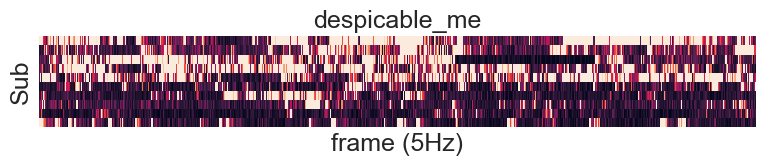

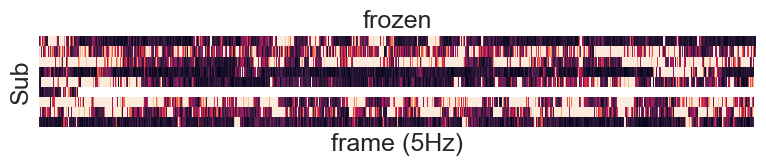

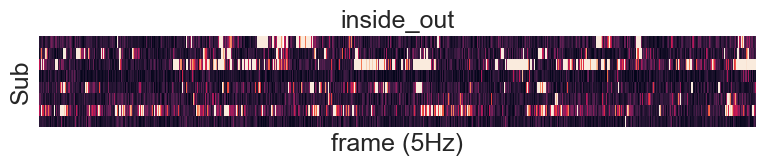

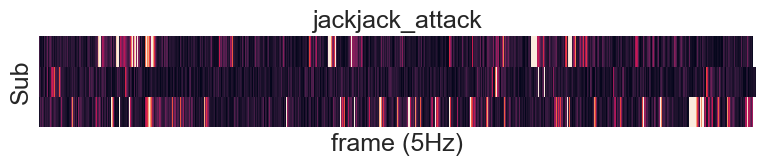

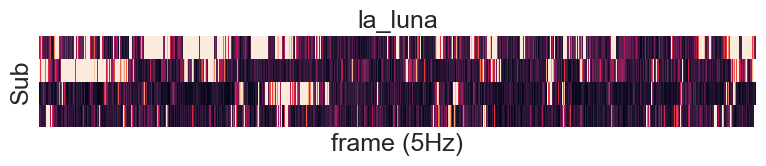

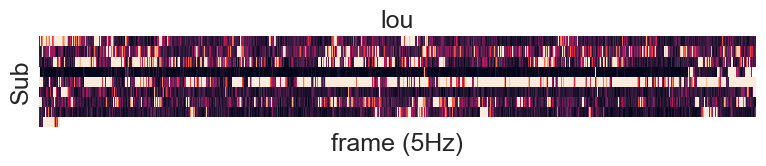

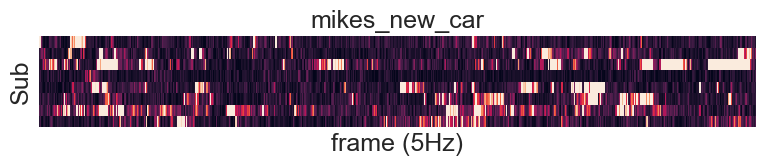

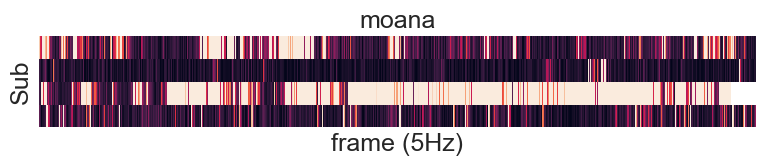

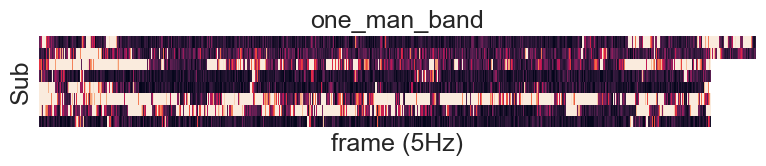

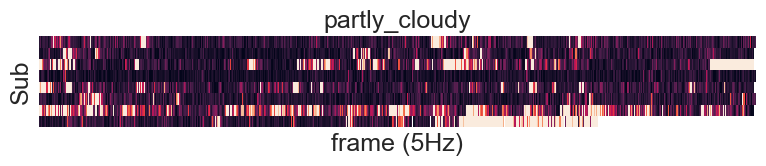

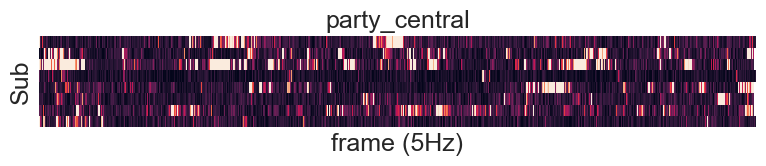

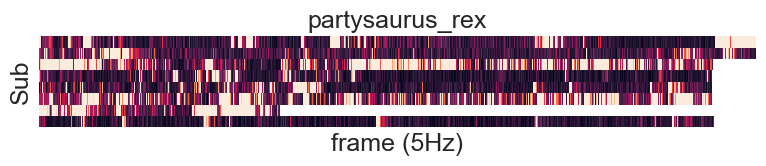

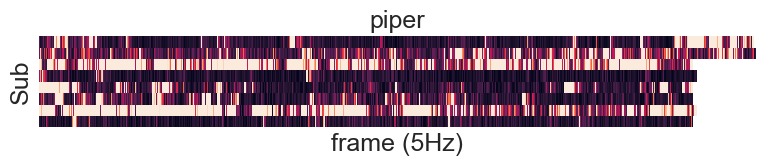

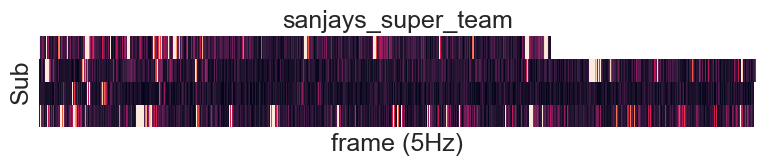

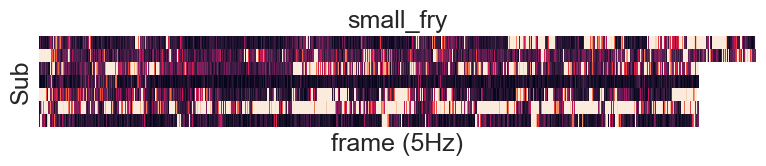

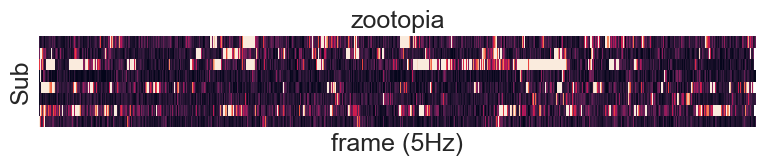

In [13]:
for mov in clipinfo.index:
    plt.figure(figsize=(8,2))
    sns.heatmap(clipmotion[mov].T, vmax=1, cbar=False)   
    plt.xticks([])
    plt.ylabel('Sub')
    plt.xlabel('frame (5Hz)')
    plt.yticks([])
    plt.title(mov)
    
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'fullsample_clip_{0}_motion_FD_timeplot.png'.format(mov)), dpi=200)
    plt.show()
    plt.close()

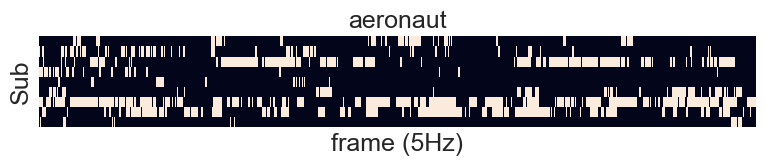

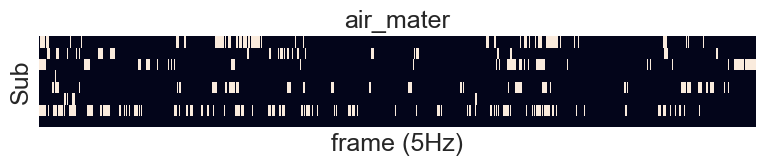

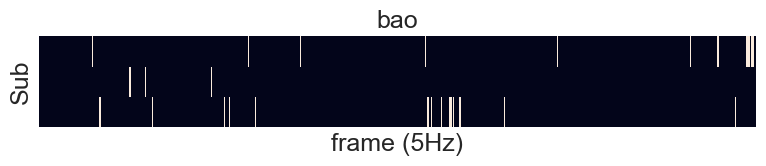

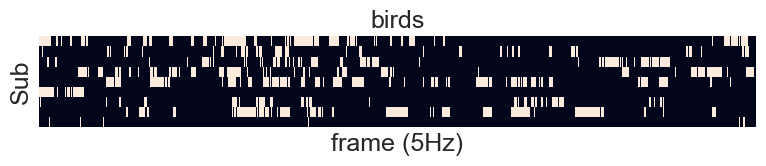

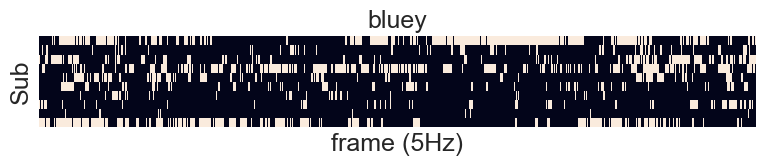

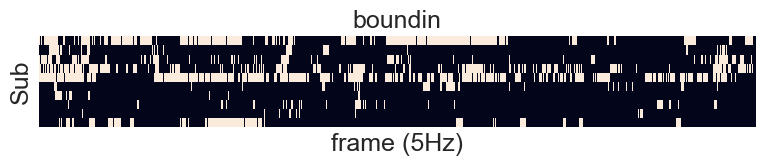

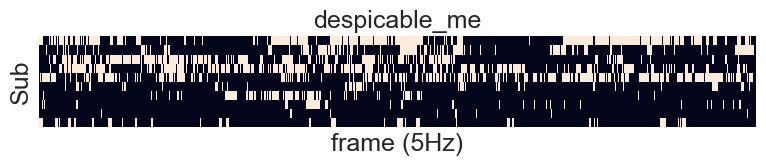

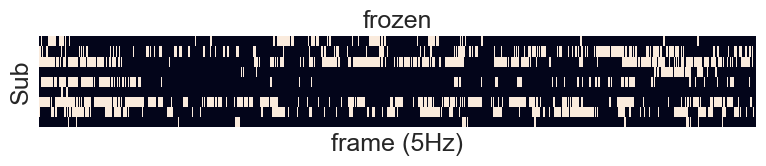

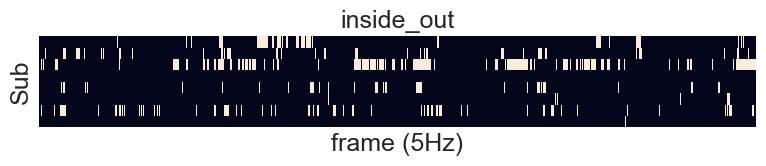

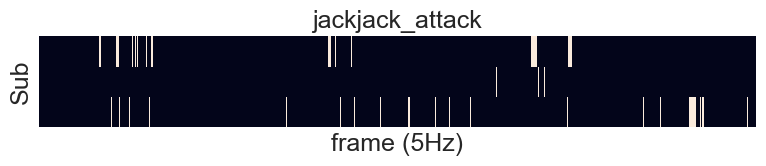

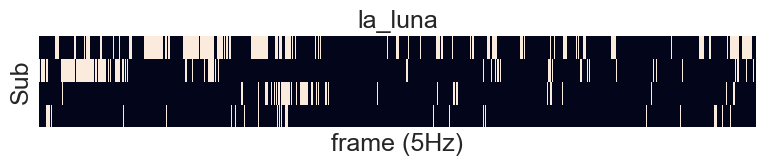

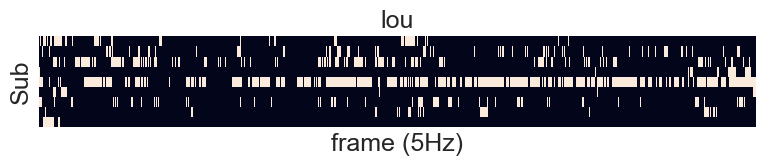

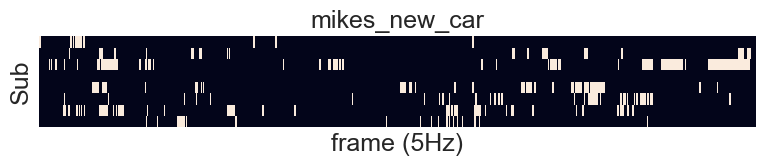

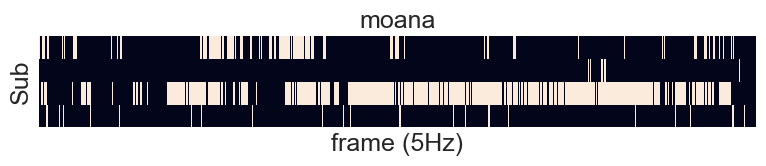

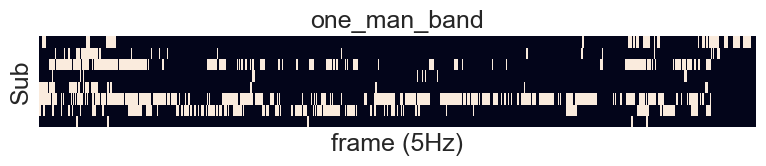

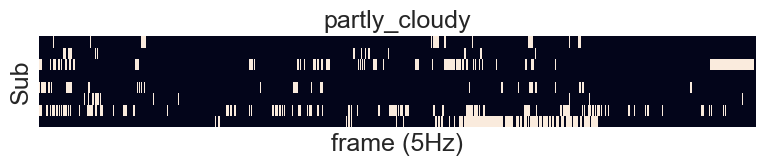

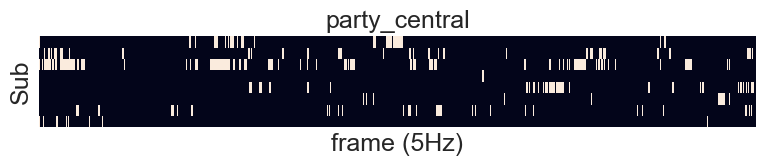

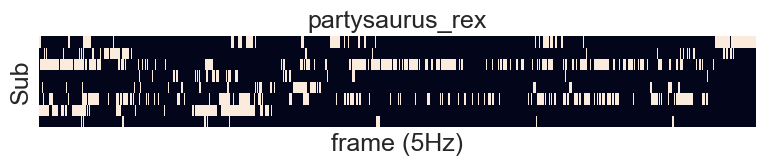

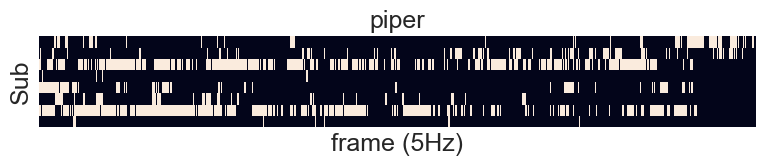

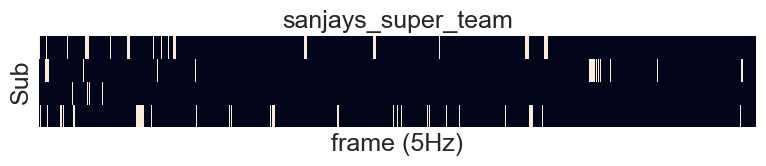

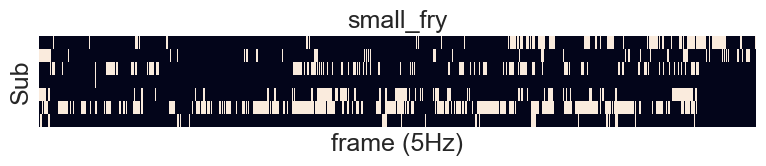

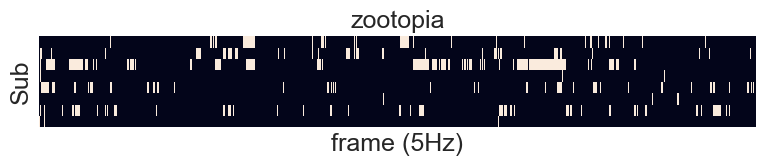

In [14]:
for mov in clipinfo.index:
    plt.figure(figsize=(8,2))
    sns.heatmap(clipmotion[mov].T>0.9, vmax=1, cbar=False)   
    plt.xticks([])
    plt.ylabel('Sub')
    plt.xlabel('frame (5Hz)')
    plt.yticks([])
    plt.title(mov)
    
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'fullsample_clip_{0}_motion_cens09_timeplot.png'.format(mov)), dpi=200)
    plt.show()
    plt.close()

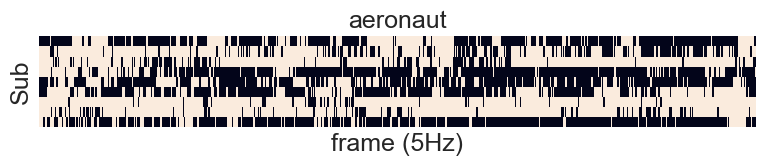

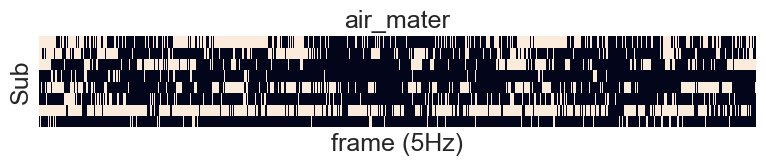

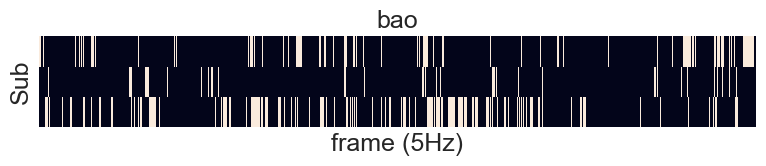

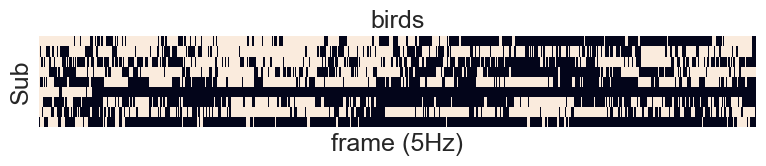

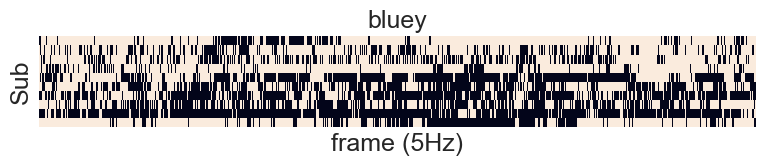

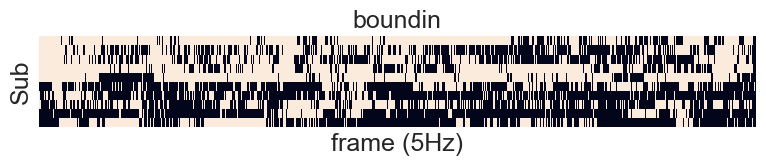

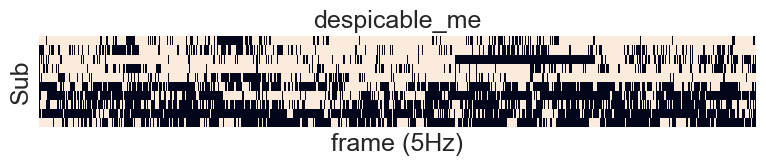

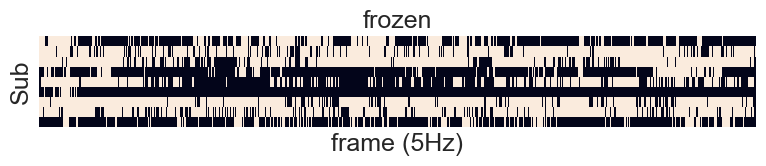

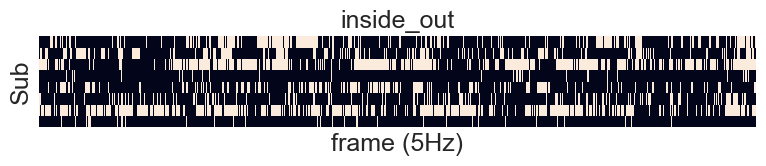

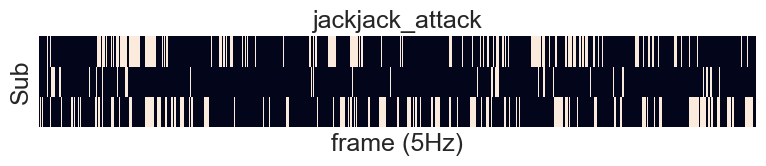

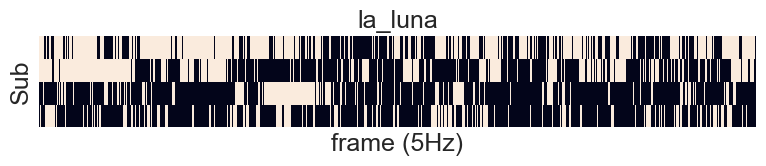

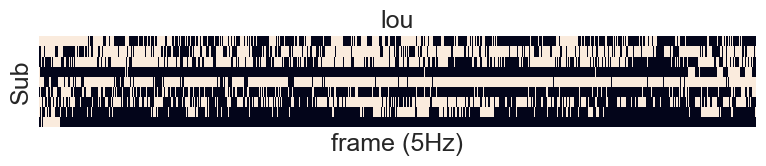

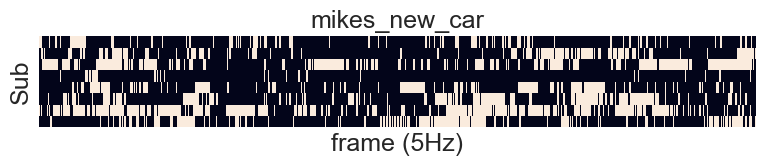

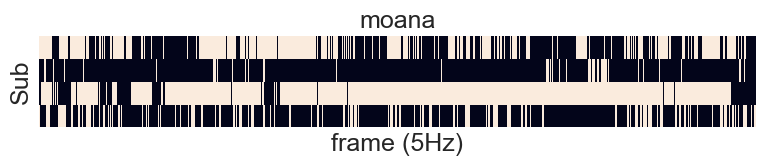

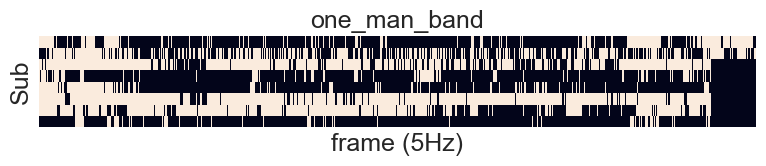

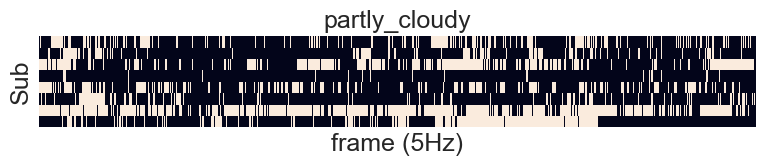

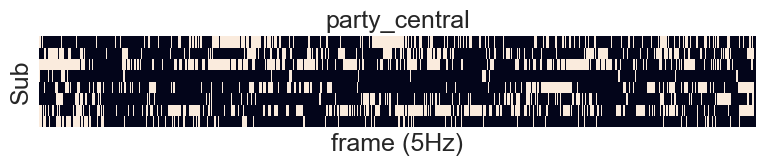

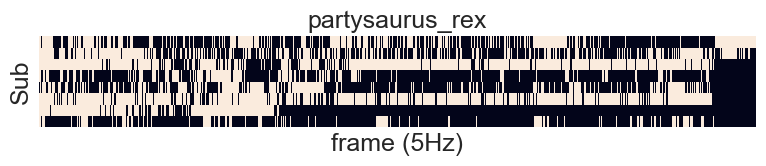

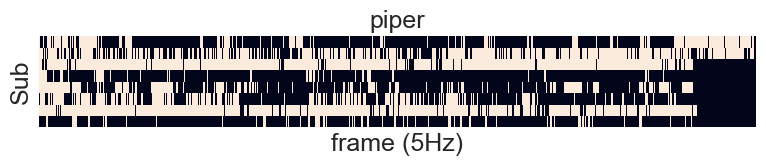

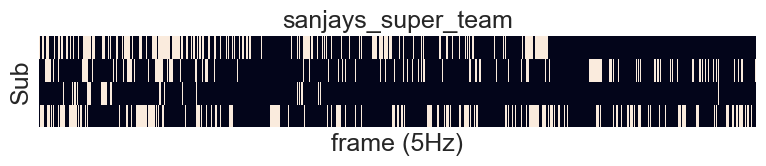

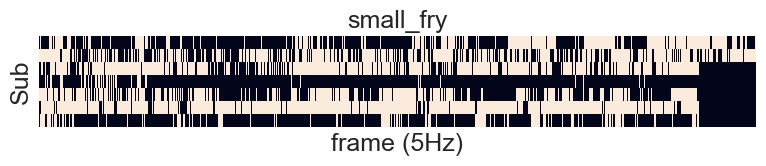

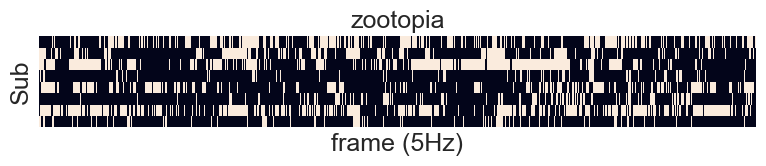

In [15]:
for mov in clipinfo.index:
    plt.figure(figsize=(8,2))
    sns.heatmap(clipmotion[mov].T>0.2, vmax=1, cbar=False)   
    plt.xticks([])
    plt.ylabel('Sub')
    plt.xlabel('frame (5Hz)')
    plt.yticks([])
    plt.title(mov)
    
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'fullsample_clip_{0}_motion_cens02_timeplot.png'.format(mov)), dpi=200)
    plt.show()
    plt.close()

# examine ratings

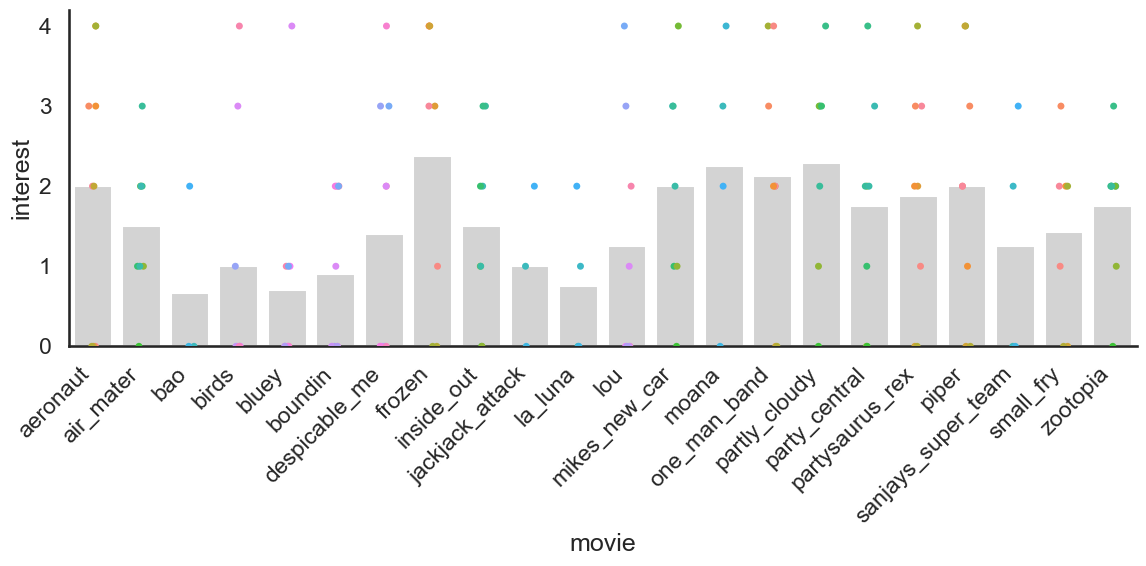

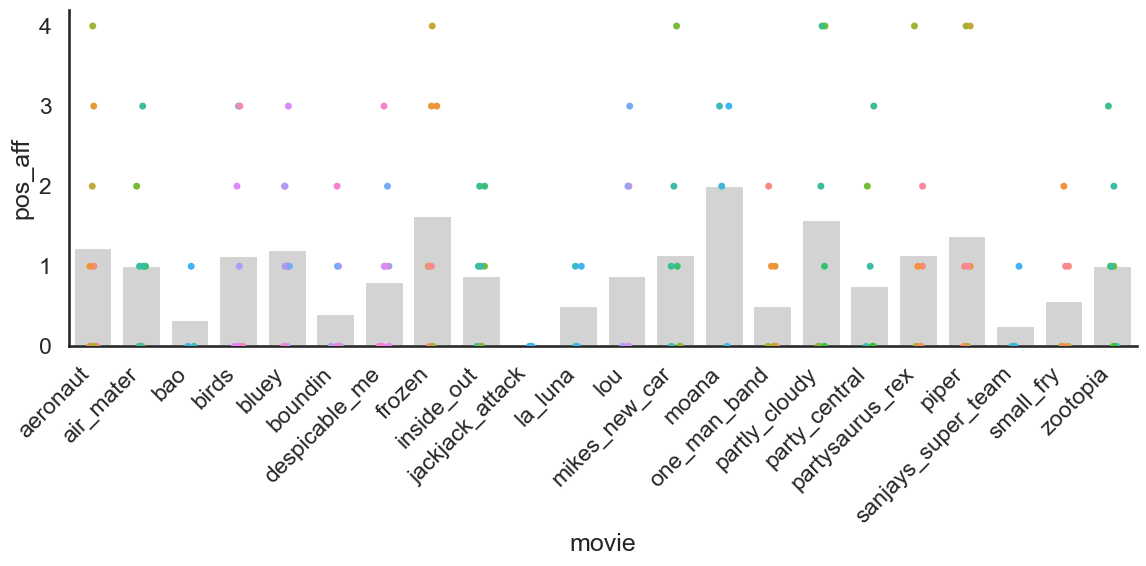

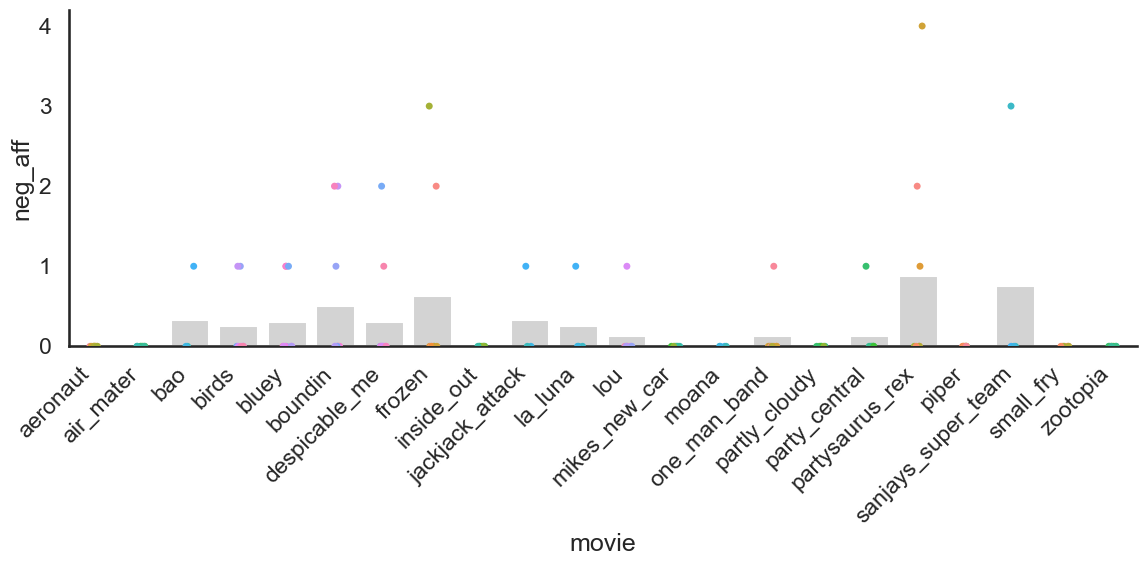

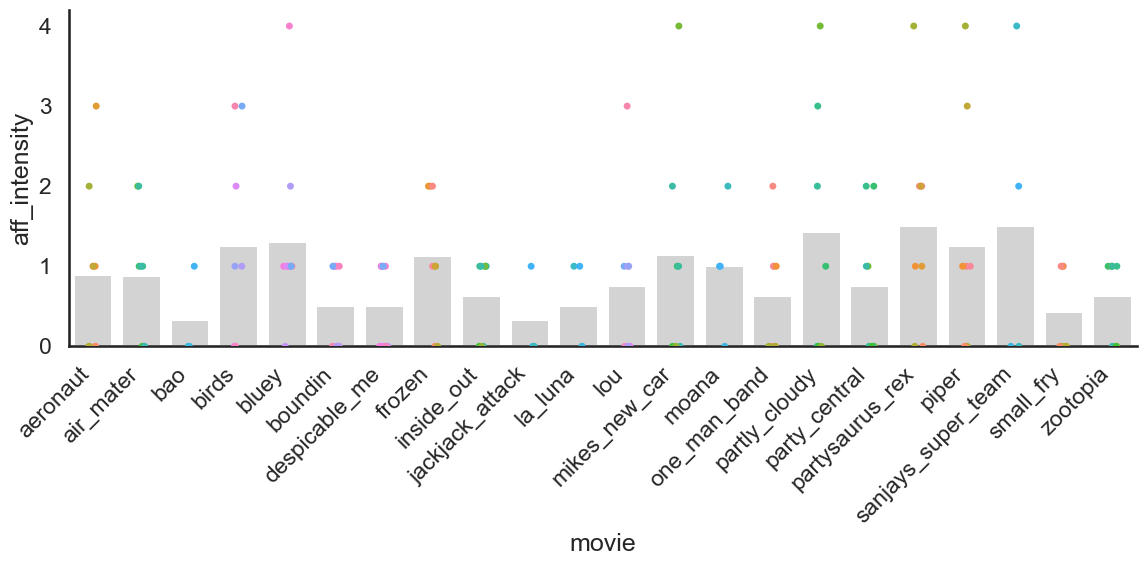

In [16]:
for v in ['interest', 'pos_aff', 'neg_aff','aff_intensity']:

    plt.figure(figsize=(12,6))
    sns.barplot(y=v,x='movie', data=data, color='lightgray',errwidth=0)
    sns.stripplot(y=v,x='movie', data=data, hue='sub')
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.legend().remove()
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'fullsample_clip_affect_{0}_plot.png'.format(v)), dpi=200)
    plt.show()
    plt.close()

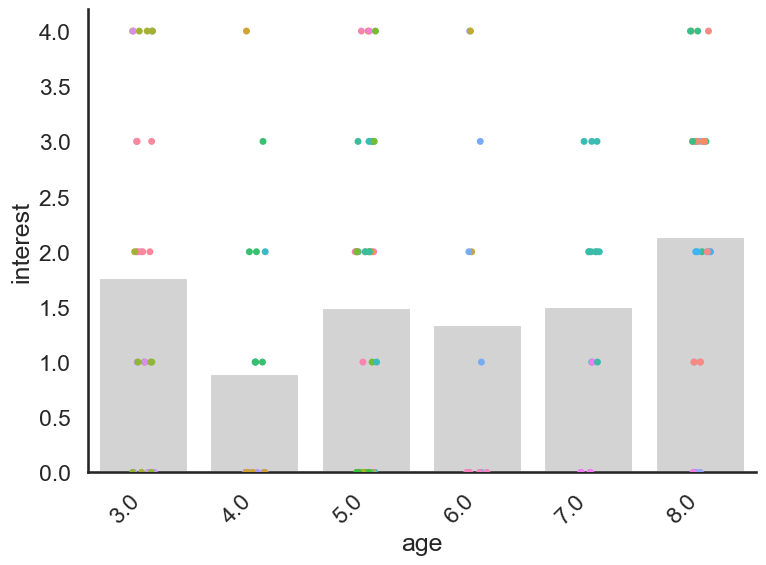

No handles with labels found to put in legend.


<Figure size 800x600 with 0 Axes>

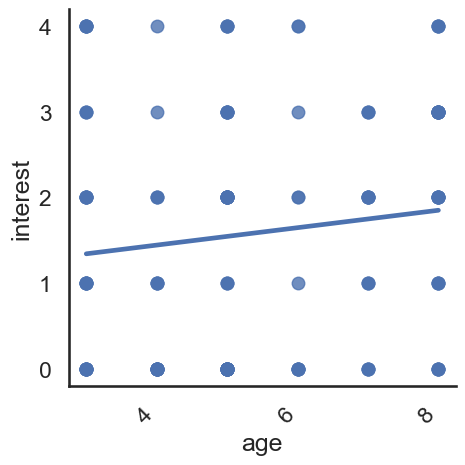

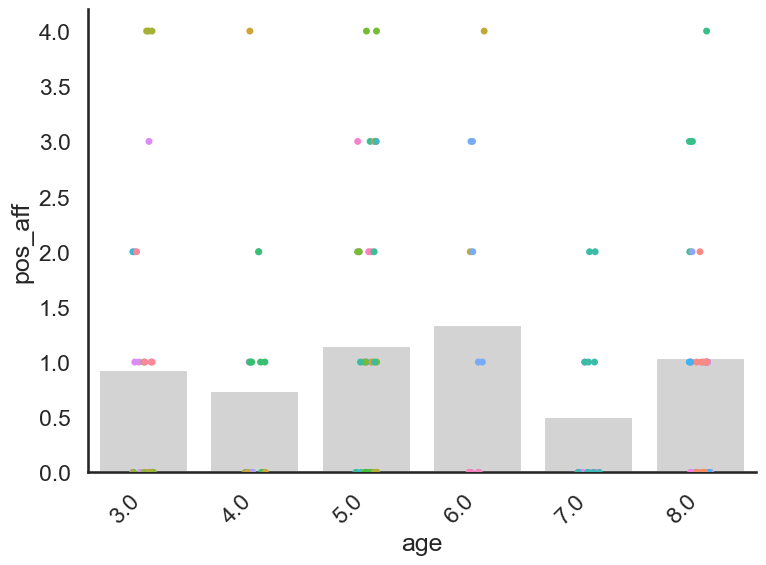

No handles with labels found to put in legend.


<Figure size 800x600 with 0 Axes>

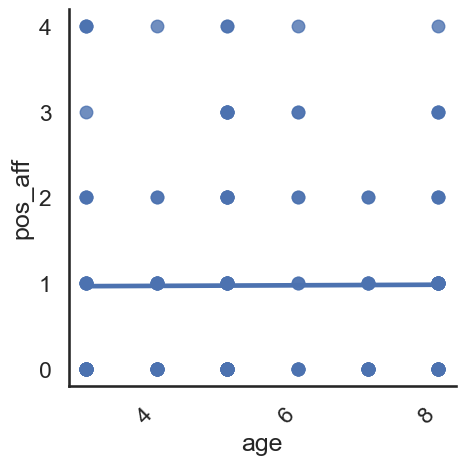

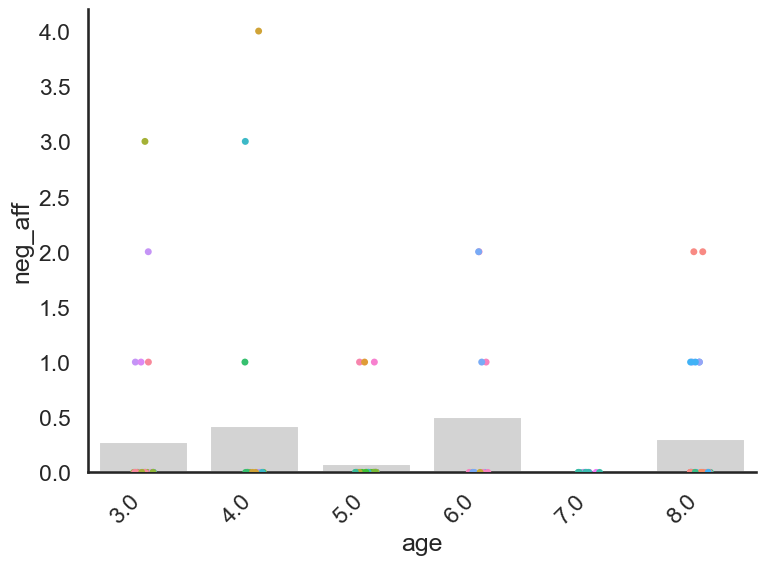

No handles with labels found to put in legend.


<Figure size 800x600 with 0 Axes>

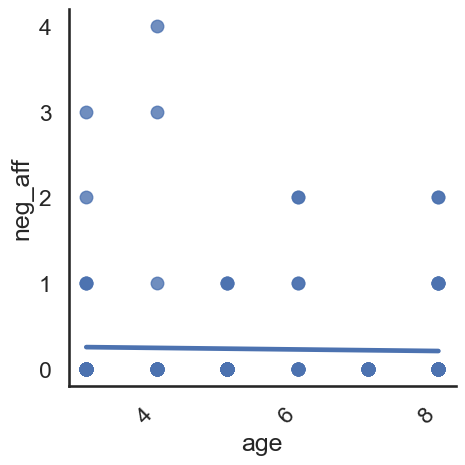

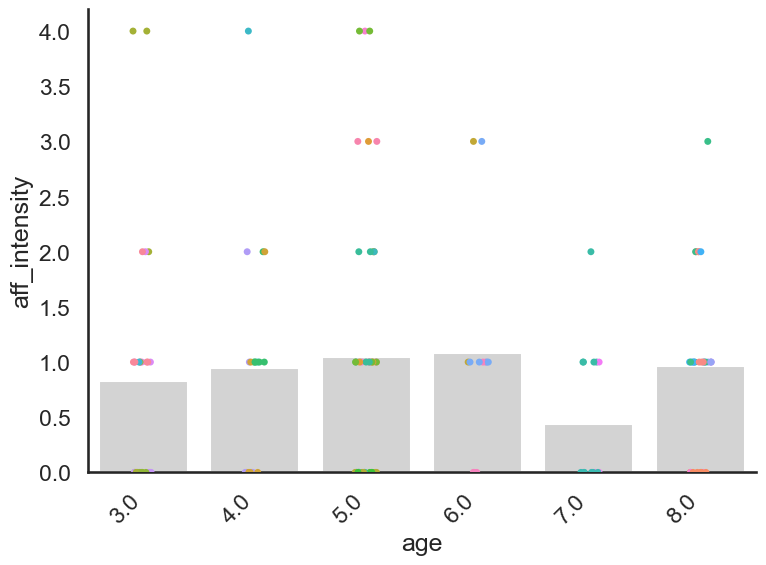

No handles with labels found to put in legend.


<Figure size 800x600 with 0 Axes>

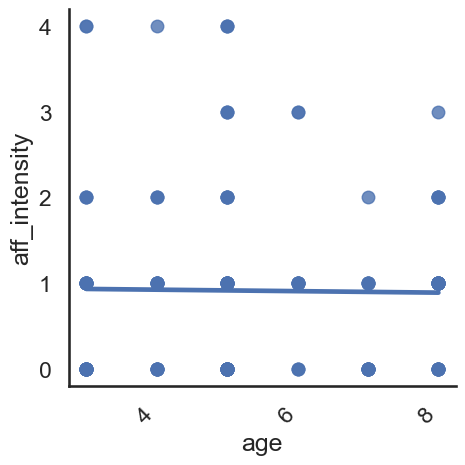

In [17]:
for v in ['interest', 'pos_aff', 'neg_aff','aff_intensity']:

    plt.figure(figsize=(8,6))
    sns.barplot(y=v,x='age', data=data, color='lightgray',errwidth=0)
    sns.stripplot(y=v,x='age', data=data, hue='sub')
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.legend().remove()
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'fullsample_age_affect_{0}_plot.png'.format(v)), dpi=200)
    plt.show()
    plt.close()
    
    plt.figure(figsize=(8,6))
    sns.lmplot(y=v,x='age', data=data, scatter=True, ci=None)
    #sns.stripplot(y=v,x='age', data=data, hue='sub')
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.legend().remove()
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'fullsample_age_affect_{0}_lineplot.png'.format(v)), dpi=200)
    plt.show()
    plt.close()

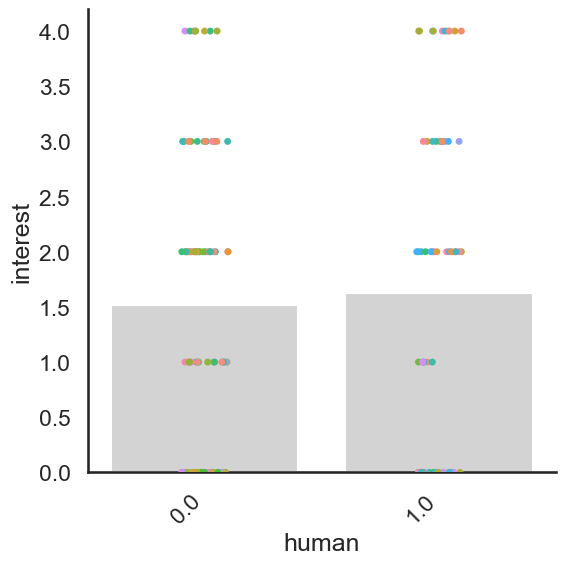

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: interest 
No. Observations: 143     Method:             REML     
No. Groups:       29      Scale:              0.9574   
Min. group size:  1       Log-Likelihood:     -226.2356
Max. group size:  6       Converged:          Yes      
Mean group size:  4.9                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept  1.527     0.221  6.904  0.000   1.094   1.961
human      0.154     0.184  0.839  0.402  -0.206   0.514
sub Var    1.020     0.380                              



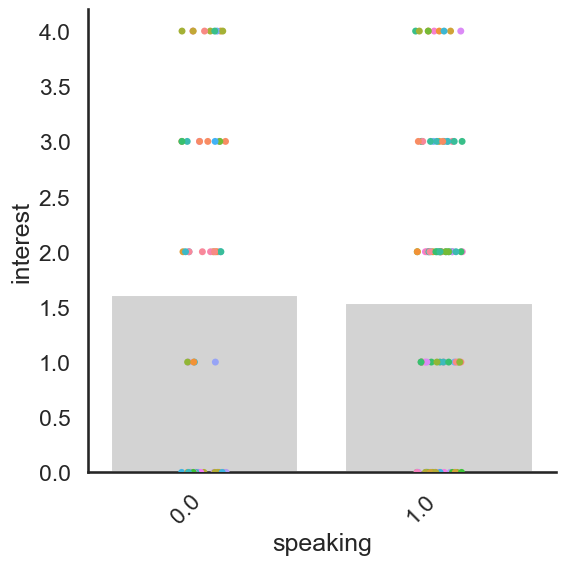

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: interest 
No. Observations: 143     Method:             REML     
No. Groups:       29      Scale:              0.9576   
Min. group size:  1       Log-Likelihood:     -226.2685
Max. group size:  6       Converged:          Yes      
Mean group size:  4.9                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     1.686    0.238  7.083 0.000  1.220  2.153
speaking     -0.146    0.185 -0.791 0.429 -0.508  0.216
sub Var       1.022    0.382                           



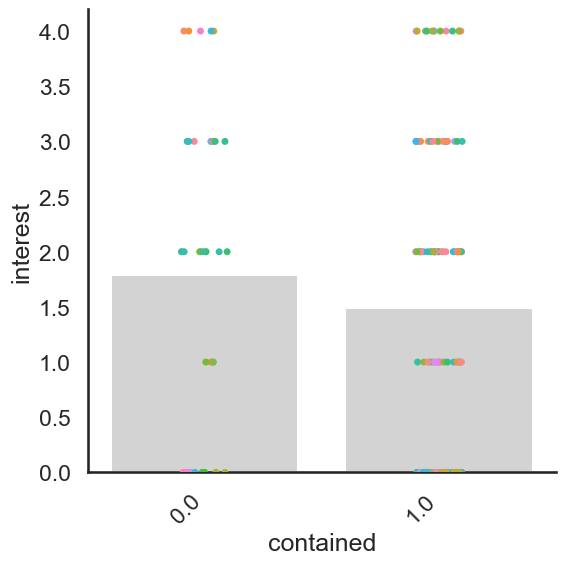

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: interest 
No. Observations: 143     Method:             REML     
No. Groups:       29      Scale:              0.9577   
Min. group size:  1       Log-Likelihood:     -226.0731
Max. group size:  6       Converged:          Yes      
Mean group size:  4.9                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     1.732    0.252  6.864 0.000  1.238  2.227
contained    -0.186    0.195 -0.954 0.340 -0.568  0.196
sub Var       1.009    0.377                           



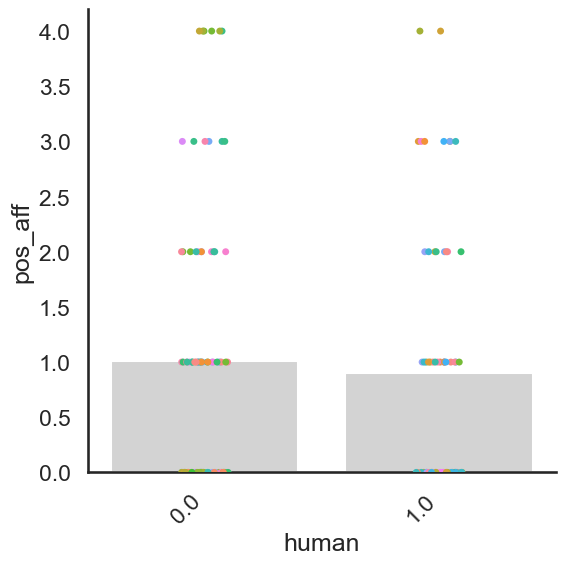

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pos_aff  
No. Observations: 143     Method:             REML     
No. Groups:       29      Scale:              0.8663   
Min. group size:  1       Log-Likelihood:     -214.0483
Max. group size:  6       Converged:          Yes      
Mean group size:  4.9                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     1.049    0.179  5.853 0.000  0.697  1.400
human        -0.130    0.173 -0.752 0.452 -0.469  0.209
sub Var       0.579    0.251                           



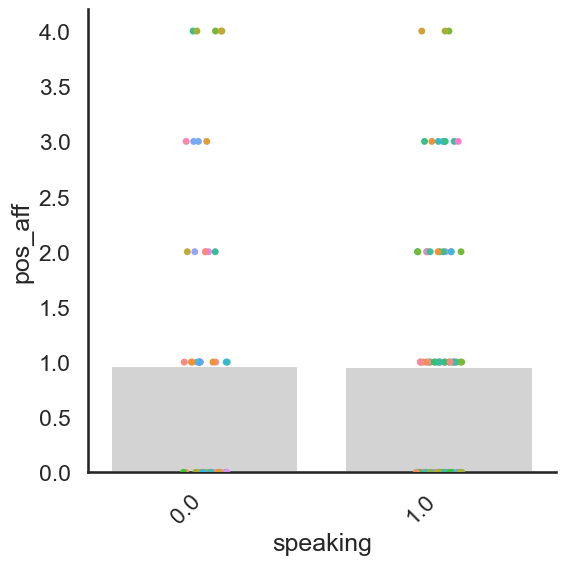

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pos_aff  
No. Observations: 143     Method:             REML     
No. Groups:       29      Scale:              0.8672   
Min. group size:  1       Log-Likelihood:     -214.1518
Max. group size:  6       Converged:          Yes      
Mean group size:  4.9                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     1.059    0.198  5.350 0.000  0.671  1.446
speaking     -0.102    0.174 -0.587 0.557 -0.444  0.239
sub Var       0.581    0.252                           



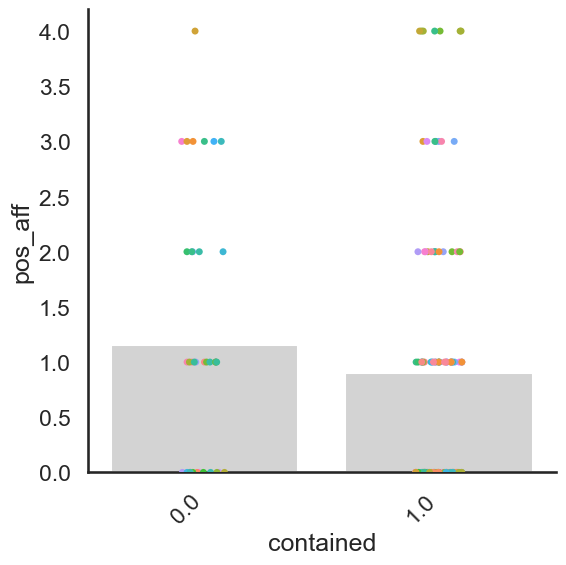

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pos_aff  
No. Observations: 143     Method:             REML     
No. Groups:       29      Scale:              0.8673   
Min. group size:  1       Log-Likelihood:     -213.9728
Max. group size:  6       Converged:          Yes      
Mean group size:  4.9                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     1.099    0.214  5.137 0.000  0.680  1.519
contained    -0.141    0.185 -0.764 0.445 -0.504  0.221
sub Var       0.574    0.249                           



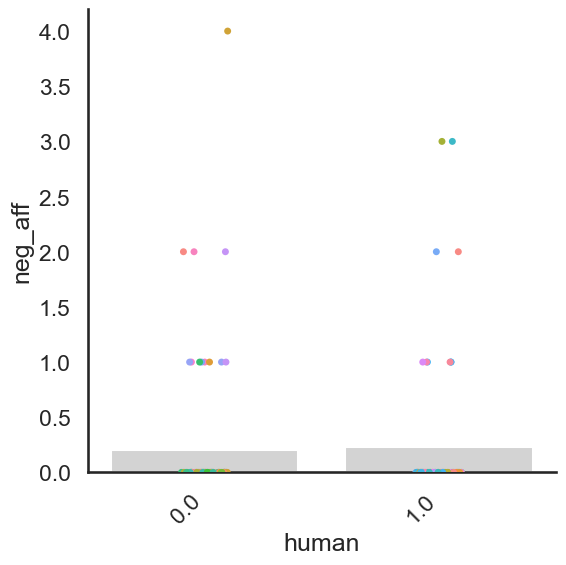

/usr/local/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: neg_aff  
No. Observations: 143     Method:             REML     
No. Groups:       29      Scale:              0.4198   
Min. group size:  1       Log-Likelihood:     -143.1228
Max. group size:  6       Converged:          Yes      
Mean group size:  4.9                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept  0.200     0.072  2.772  0.006   0.059   0.341
human      0.076     0.115  0.660  0.509  -0.149   0.301
sub Var    0.000     0.042                              



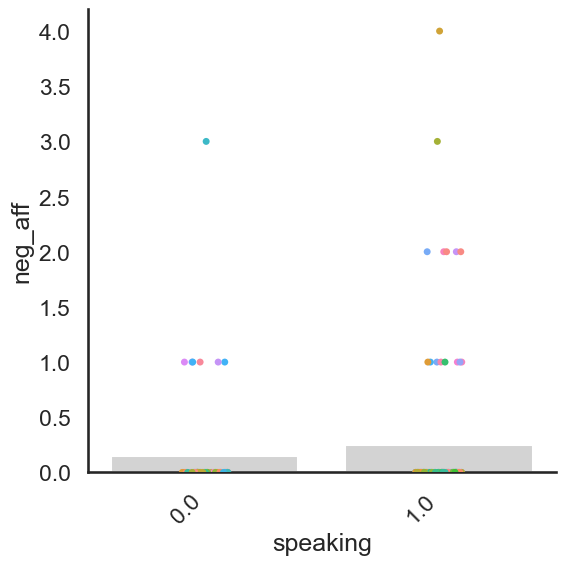

/usr/local/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: neg_aff  
No. Observations: 143     Method:             REML     
No. Groups:       29      Scale:              0.4108   
Min. group size:  1       Log-Likelihood:     -143.0029
Max. group size:  6       Converged:          Yes      
Mean group size:  4.9                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept  0.169     0.094  1.791  0.073  -0.016   0.354
speaking   0.098     0.119  0.817  0.414  -0.137   0.332
sub Var    0.009     0.046                              



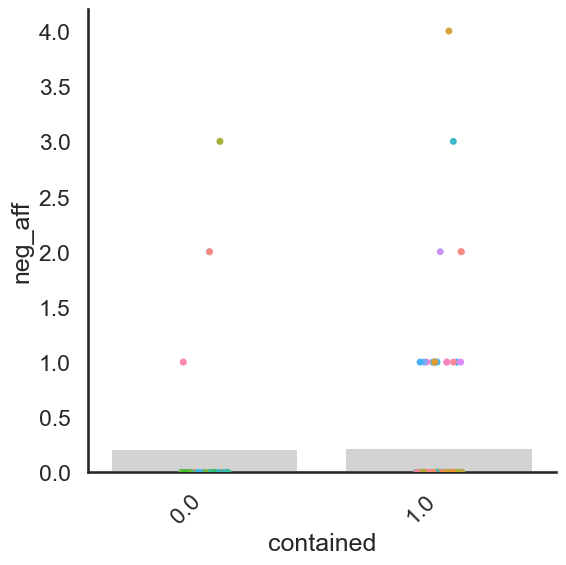

/usr/local/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: neg_aff  
No. Observations: 143     Method:             REML     
No. Groups:       29      Scale:              0.4205   
Min. group size:  1       Log-Likelihood:     -143.2253
Max. group size:  6       Converged:          Yes      
Mean group size:  4.9                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept  0.229     0.112  2.053  0.040   0.010   0.448
contained  0.002     0.128  0.018  0.986  -0.249   0.253
sub Var    0.001     0.040                              



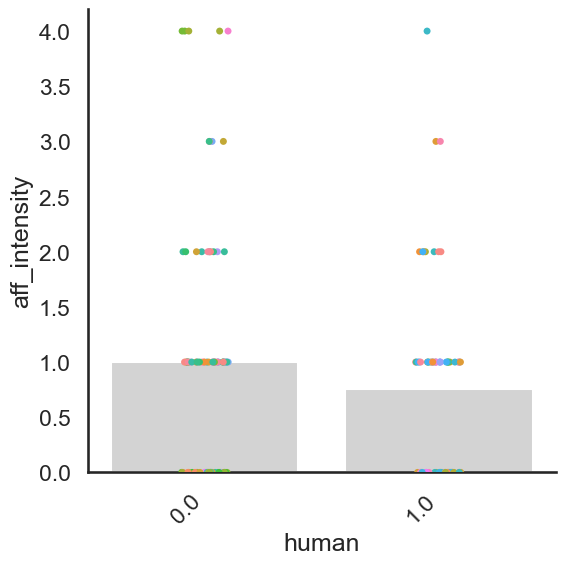

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: aff_intensity
No. Observations: 143     Method:             REML         
No. Groups:       29      Scale:              0.6357       
Min. group size:  1       Log-Likelihood:     -192.1646    
Max. group size:  6       Converged:          Yes          
Mean group size:  4.9                                      
------------------------------------------------------------
             Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept     1.085     0.154   7.064  0.000   0.784   1.386
human        -0.353     0.149  -2.376  0.017  -0.645  -0.062
sub Var       0.422     0.215                               



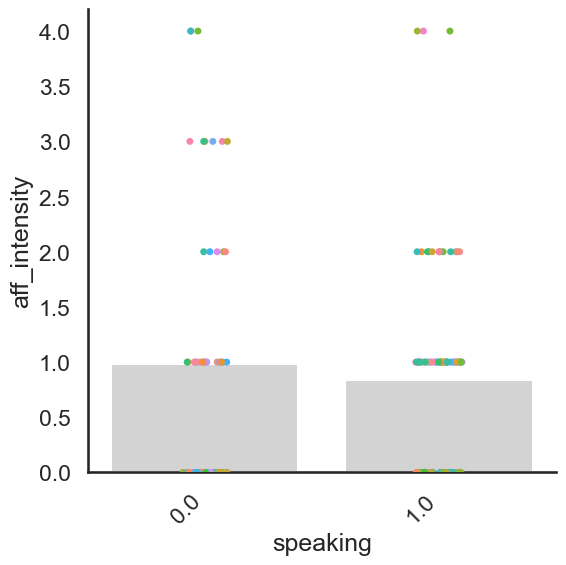

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: aff_intensity
No. Observations: 143     Method:             REML         
No. Groups:       29      Scale:              0.6673       
Min. group size:  1       Log-Likelihood:     -194.2751    
Max. group size:  6       Converged:          Yes          
Mean group size:  4.9                                      
------------------------------------------------------------
             Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept     1.042     0.167   6.222  0.000   0.713   1.370
speaking     -0.171     0.152  -1.119  0.263  -0.469   0.128
sub Var       0.390     0.197                               



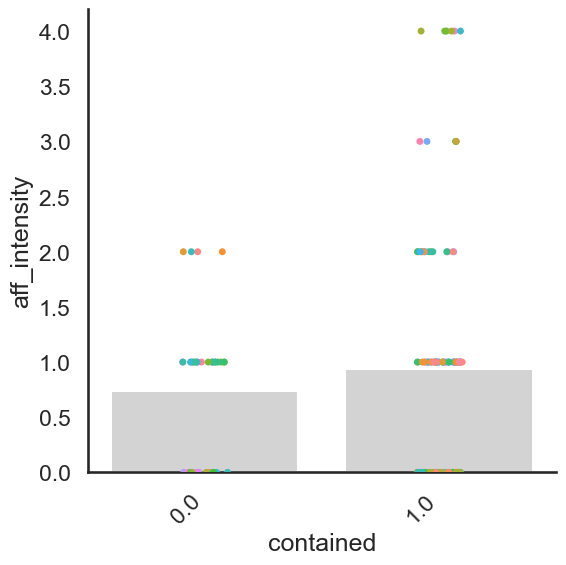

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: aff_intensity
No. Observations: 143     Method:             REML         
No. Groups:       29      Scale:              0.6563       
Min. group size:  1       Log-Likelihood:     -193.3574    
Max. group size:  6       Converged:          Yes          
Mean group size:  4.9                                      
------------------------------------------------------------
               Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept      0.724     0.183  3.966  0.000   0.366   1.082
contained      0.278     0.161  1.731  0.083  -0.037   0.593
sub Var        0.396     0.200                              



In [18]:
for v in ['interest', 'pos_aff', 'neg_aff','aff_intensity']:
    for f in ['human','speaking','contained']:

        plt.figure(figsize=(6,6))
        sns.barplot(y=v,x=f, data=data, color='lightgray', errwidth=0)
        sns.stripplot(y=v,x=f, data=data, hue='sub')
        plt.xticks(rotation=45, ha='right')
        sns.despine()
        plt.legend().remove()
        plt.tight_layout()
        plt.savefig(os.path.join(figs_dir, 'fullsample_feature_{0}_affect_{1}_plot.png'.format(f,v)), dpi=200)
        plt.show()
        plt.close()
        
        temp = data.dropna().copy()
        res = smf.mixedlm('{0} ~ {1}'.format(v,f), groups='sub', data=temp).fit()
        print(res.summary())